# Problem Statement 

**To predict if the car purchased at the Auction is a Kick (bad buy)**
<br/>

#### Background 

An auto dealership faces a significant challenge when purchasing used cars at auctions due to the potential risk of acquiring vehicles with serious issues that make them unsuitable for sale. These problematic purchases are commonly referred to as "kicks" within the auto community.

Kicked cars often arise from various factors such as tampered odometers, unresolved mechanical problems, difficulties in obtaining the vehicle title from the seller, or other unexpected issues. Dealing with kick cars can be financially burdensome for dealerships, involving expenses for transportation, extensive repairs, and losses when trying to resell the vehicle.

#### Data Overview 

*   There are 34 Feature 
*   The data conatins missing values
*   The target feature has 2 catagories hence its a binary classification problem 
*   More context on data is in Carvana_Data_Dictionary.txt  




# Import Modules

In [573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras

# Data Ingestion 

### Data imports and Understanding Data 

In [574]:
df_train = pd.read_csv('/content/training.csv')
df_train.head(10)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


We see first 10 lines of Train set and how the data looks

In [575]:
df_test = pd.read_csv('/content/test.csv')
df_test.head(10)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
5,73020,12/2/2009,ADESA,2006,3,DODGE,STRATUS 4C,SXT,4D SEDAN,GREEN,...,7118.0,8102.0,NaN,NaN,18881,30212,GA,4200.0,0,1341
6,73021,12/2/2009,ADESA,2006,3,FORD,EXPLORER 2WD V6,XLS,4D SUV 4.0L XLS,BROWN,...,13679.0,14650.0,NaN,NaN,18881,30212,GA,8500.0,0,1155
7,73022,12/2/2009,ADESA,2003,6,CHRYSLER,PT CRUISER,Tou,4D SEDAN LIMITED,BLUE,...,6912.0,7734.0,NaN,NaN,18881,30212,GA,4100.0,0,1689
8,73023,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU 4C,Bas,4D SEDAN,SILVER,...,7412.0,8507.0,NaN,NaN,18111,30212,GA,5900.0,0,764
9,73024,12/2/2009,ADESA,2006,3,CHRYSLER,TOWN & COUNTRY FWD V,Tou,MINIVAN 3.8L,WHITE,...,13162.0,15506.0,NaN,NaN,18111,30212,GA,6700.0,0,1623


We see first 10 lines of Test set and how the data looks

In [576]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

We see description of what data types the features are and how many non_null values are present in train set

In [577]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

We see description of what data types the features are and how many non_null values are present in test set

### Descriptive Statistics 

In [578]:
df_train.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


This gives us statistical information on the data and how the data is divided. all the above parameter are extremely crutial to understand. 

In [579]:
df_train.shape

(72983, 34)

this gives us how many rows and columns are present in train set

In [580]:
df_test.shape

(48707, 33)

this gives us how many rows and columns are present in test set

# Exploratory Data Analysis

<Axes: title={'center': 'Over all Purchase Ratio'}, ylabel='IsBadBuy'>

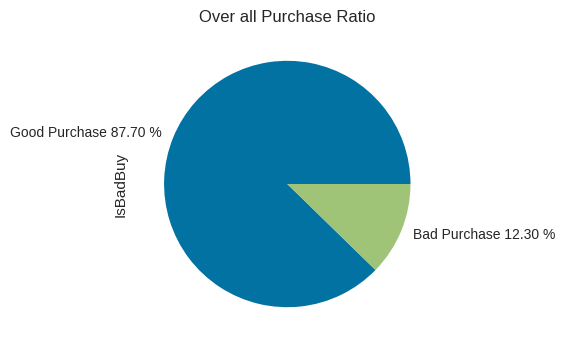

In [581]:
df_train["IsBadBuy"].value_counts().plot(kind="pie", title="Over all Purchase Ratio",
                                labels = ["Good Purchase {:.2f} %".format(len(df_train.loc[df_train.IsBadBuy==0])*100/len(df_train.IsBadBuy)),
                                          "Bad Purchase {:.2f} %".format(len(df_train.loc[df_train.IsBadBuy==1])*100/len(df_train.IsBadBuy))],
                                figsize=(4,4))

The above pie chart show what percent of Purchases made were good and how much was bad 

In [582]:
df_train.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

This gives a overview of nwo many null values are present in which feature

In [583]:
missing_count = pd.DataFrame(
    df_train.isna().sum()[df_train.isna().sum() > 0].sort_values(ascending=False),
    columns=['counts'],
)
missing_count

,counts
AUCGUART,69564
PRIMEUNIT,69564
WheelType,3174
WheelTypeID,3169
Trim,2360
MMRCurrentAuctionAveragePrice,315
MMRCurrentAuctionCleanPrice,315
MMRCurrentRetailAveragePrice,315
MMRCurrentRetailCleanPrice,315
MMRAcquisitionAuctionCleanPrice,18


the above function sorts features based on their null count 

In [584]:
df_train.nunique()

RefId                                72983
IsBadBuy                                 2
PurchDate                              517
Auction                                  3
VehYear                                 10
VehicleAge                              10
Make                                    33
Model                                 1063
Trim                                   134
SubModel                               863
Color                                   16
Transmission                             3
WheelTypeID                              4
WheelType                                3
VehOdo                               39947
Nationality                              4
Size                                    12
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice    10342
MMRAcquisitionAuctionCleanPrice      11379
MMRAcquisitionRetailAveragePrice     12725
MMRAcquisitonRetailCleanPrice        13456
MMRCurrentAuctionAveragePrice        10315
MMRCurrentA

this helps us understand which feature has how many unique values. This is used to understand which catagorical feature and how many catagories are present in each.

In [585]:
columns_to_drop = ['PRIMEUNIT', 'AUCGUART','RefId','WheelTypeID','VNST','VNZIP1','IsOnlineSale','BYRNO','PurchDate']
df_train = df_train.drop(columns_to_drop, axis=1)

Here we see that there are too many values missing in the feature PRIMEUNIT and AUCGUART. it would be ideal to drop the features and not perform impute values in these features as imputation would just bias or non-contributing factor to yeild the result 


The following columns will be dropped:

*BYRNO* - It is unique number assigned to the buyer that purchased the vehicle. Can be ignored.

*WheelTypeID* - WheelTypeID and is numerical form of WheelType. So it can be removed.

*VNST and VNZIP* - State and Zipcode of vehicle purchase location, which is useless.

*PurchDate * - Purchase date will be useless as well. 

*IsOnlineSale* -  no variance in this feature and feature see irrelavant

In [586]:
columns_to_drop = ['Model','SubModel','Trim']
df_train = df_train.drop(columns_to_drop, axis=1)

*Submodel, Model and Trim*- these features are dropped as there is too much variablity / too many catogories which can also be called high cardinality

In [587]:
categorical_cols = df_train.select_dtypes(include='object').columns.to_list()
numerical_cols = df_train.select_dtypes(include=np.number).columns.to_list()

here we take all the numeric and catagorical features names in their respective. which is futher helpful for feature engineering  

In [588]:
numerical_cols.remove('IsBadBuy')

IsBadBuy is removed as it is the target feature and we would like to find multicolliearity in independent numeric features

In [589]:
df_train[categorical_cols].head()

,Auction,Make,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName
0,ADESA,MAZDA,RED,AUTO,Alloy,OTHER ASIAN,MEDIUM,OTHER
1,ADESA,DODGE,WHITE,AUTO,Alloy,AMERICAN,LARGE TRUCK,CHRYSLER
2,ADESA,DODGE,MAROON,AUTO,Covers,AMERICAN,MEDIUM,CHRYSLER
3,ADESA,DODGE,SILVER,AUTO,Alloy,AMERICAN,COMPACT,CHRYSLER
4,ADESA,FORD,SILVER,MANUAL,Covers,AMERICAN,COMPACT,FORD


In [590]:
corr =df_train[numerical_cols].corr()

calculates the correlation matrix for the numerical columns in the DataFrame

<Axes: >

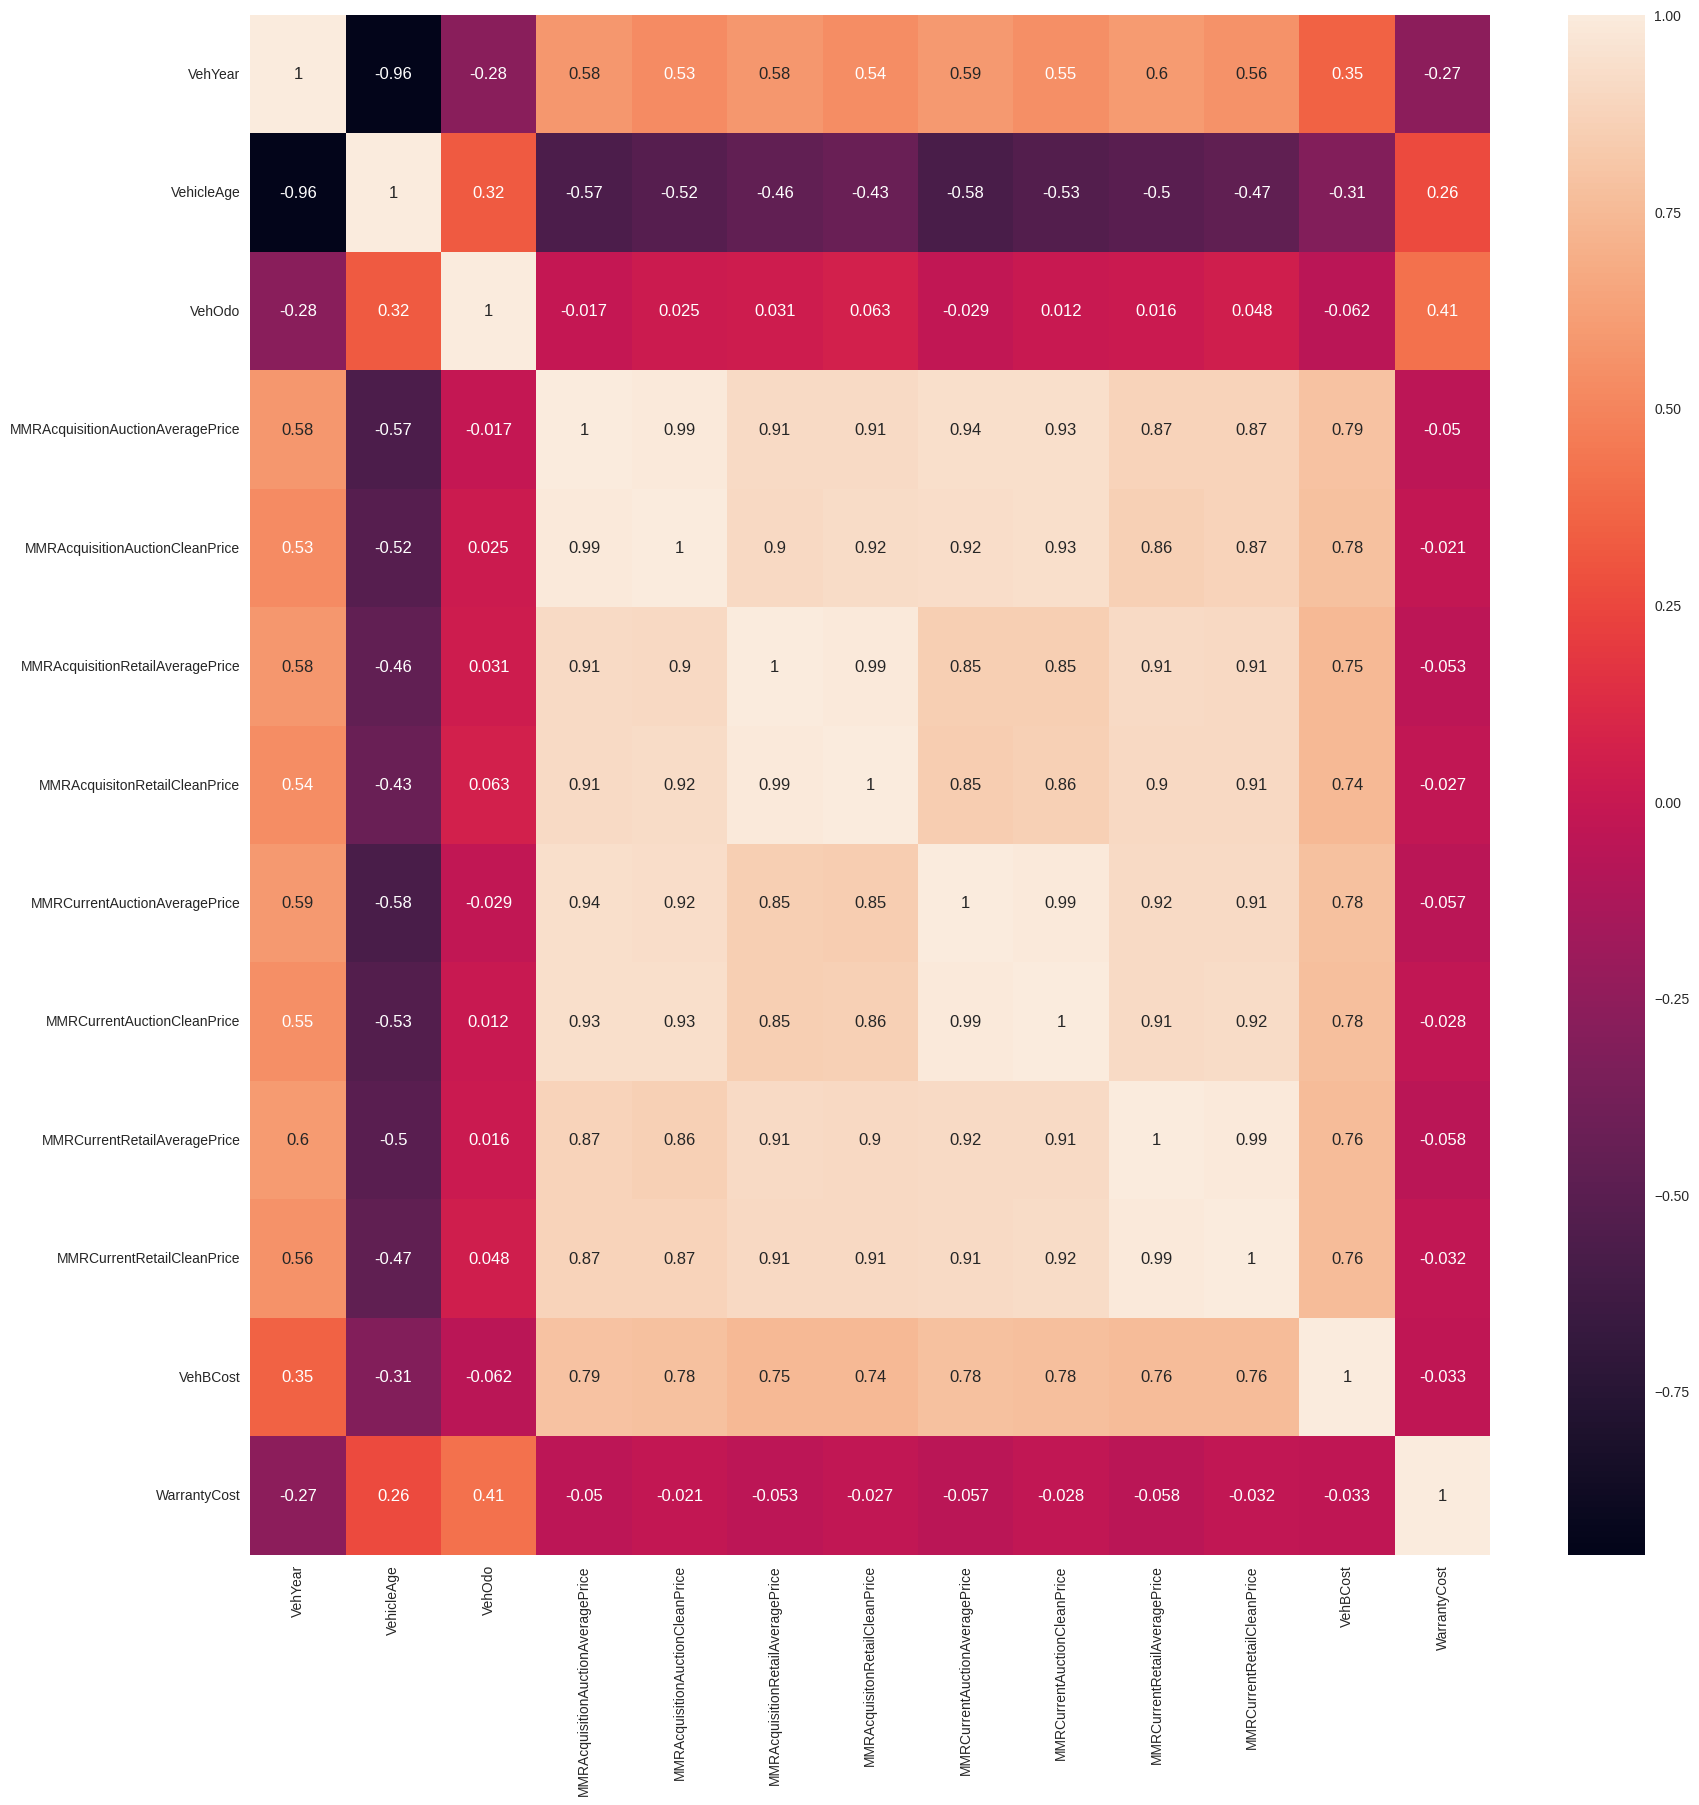

In [591]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,xticklabels=df_train[numerical_cols].columns,yticklabels=df_train[numerical_cols].columns,annot=True,ax=ax)

the above is a heat map which depicts correlated among independent numeric feature

VehicleAge - Vehyear is highly negatively correlated and MMRAcquisitionAuctionCleanPrice - MMRAcquisitionAuctionAveragePriceare is highly positively correlated. hence, either one can be eliminated as their effect toward predicting the target variable is the same. this situation where independent variable are highly correlated are called Multicollinearity. 

In [592]:
numerical_cols.remove('MMRAcquisitionAuctionAveragePrice')
numerical_cols.remove('VehicleAge')

# Data transformation and Feature Engineering

## Imputation 

In [593]:
df_train.isna().sum()

IsBadBuy                                0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Color                                   8
Transmission                            9
WheelType                            3174
VehOdo                                  0
Nationality                             5
Size                                    5
TopThreeAmericanName                    5
MMRAcquisitionAuctionAveragePrice      18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitonRetailCleanPrice          18
MMRCurrentAuctionAveragePrice         315
MMRCurrentAuctionCleanPrice           315
MMRCurrentRetailAveragePrice          315
MMRCurrentRetailCleanPrice            315
VehBCost                                0
WarrantyCost                            0
dtype: int64

In [594]:


# Imputing missing values for numeric variables
numeric_imputer = SimpleImputer(strategy='mean')  # You can choose different strategies like 'median', 'most_frequent', etc.
df_train[numerical_cols] = numeric_imputer.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = numeric_imputer.fit_transform(df_test[numerical_cols])

# Imputing missing values for categorical variables
categorical_imputer = SimpleImputer(strategy='most_frequent')  # You can choose different strategies like 'constant' with a specific value
df_train[categorical_cols] = categorical_imputer.fit_transform(df_train[categorical_cols])
df_test[categorical_cols] = categorical_imputer.fit_transform(df_test[categorical_cols])

imputation on numeric and categorical values respectively is performed. We replace the missing values in Categorical features with the most occurring value in that feature and We replace the missing values in Numeric features with mean of that numeric feature columns

In [595]:
target=['IsBadBuy']
total_columns = numerical_cols+categorical_cols+target
df_train = df_train[total_columns]

A fresh DataFrame with preprossed Numeric and categorical features is formed

In [596]:
df_train.isna().sum()

VehYear                             0
VehOdo                              0
MMRAcquisitionAuctionCleanPrice     0
MMRAcquisitionRetailAveragePrice    0
MMRAcquisitonRetailCleanPrice       0
MMRCurrentAuctionAveragePrice       0
MMRCurrentAuctionCleanPrice         0
MMRCurrentRetailAveragePrice        0
MMRCurrentRetailCleanPrice          0
VehBCost                            0
WarrantyCost                        0
Auction                             0
Make                                0
Color                               0
Transmission                        0
WheelType                           0
Nationality                         0
Size                                0
TopThreeAmericanName                0
IsBadBuy                            0
dtype: int64

Now the Data is free from null values.

## Standardization of Data

<Axes: >

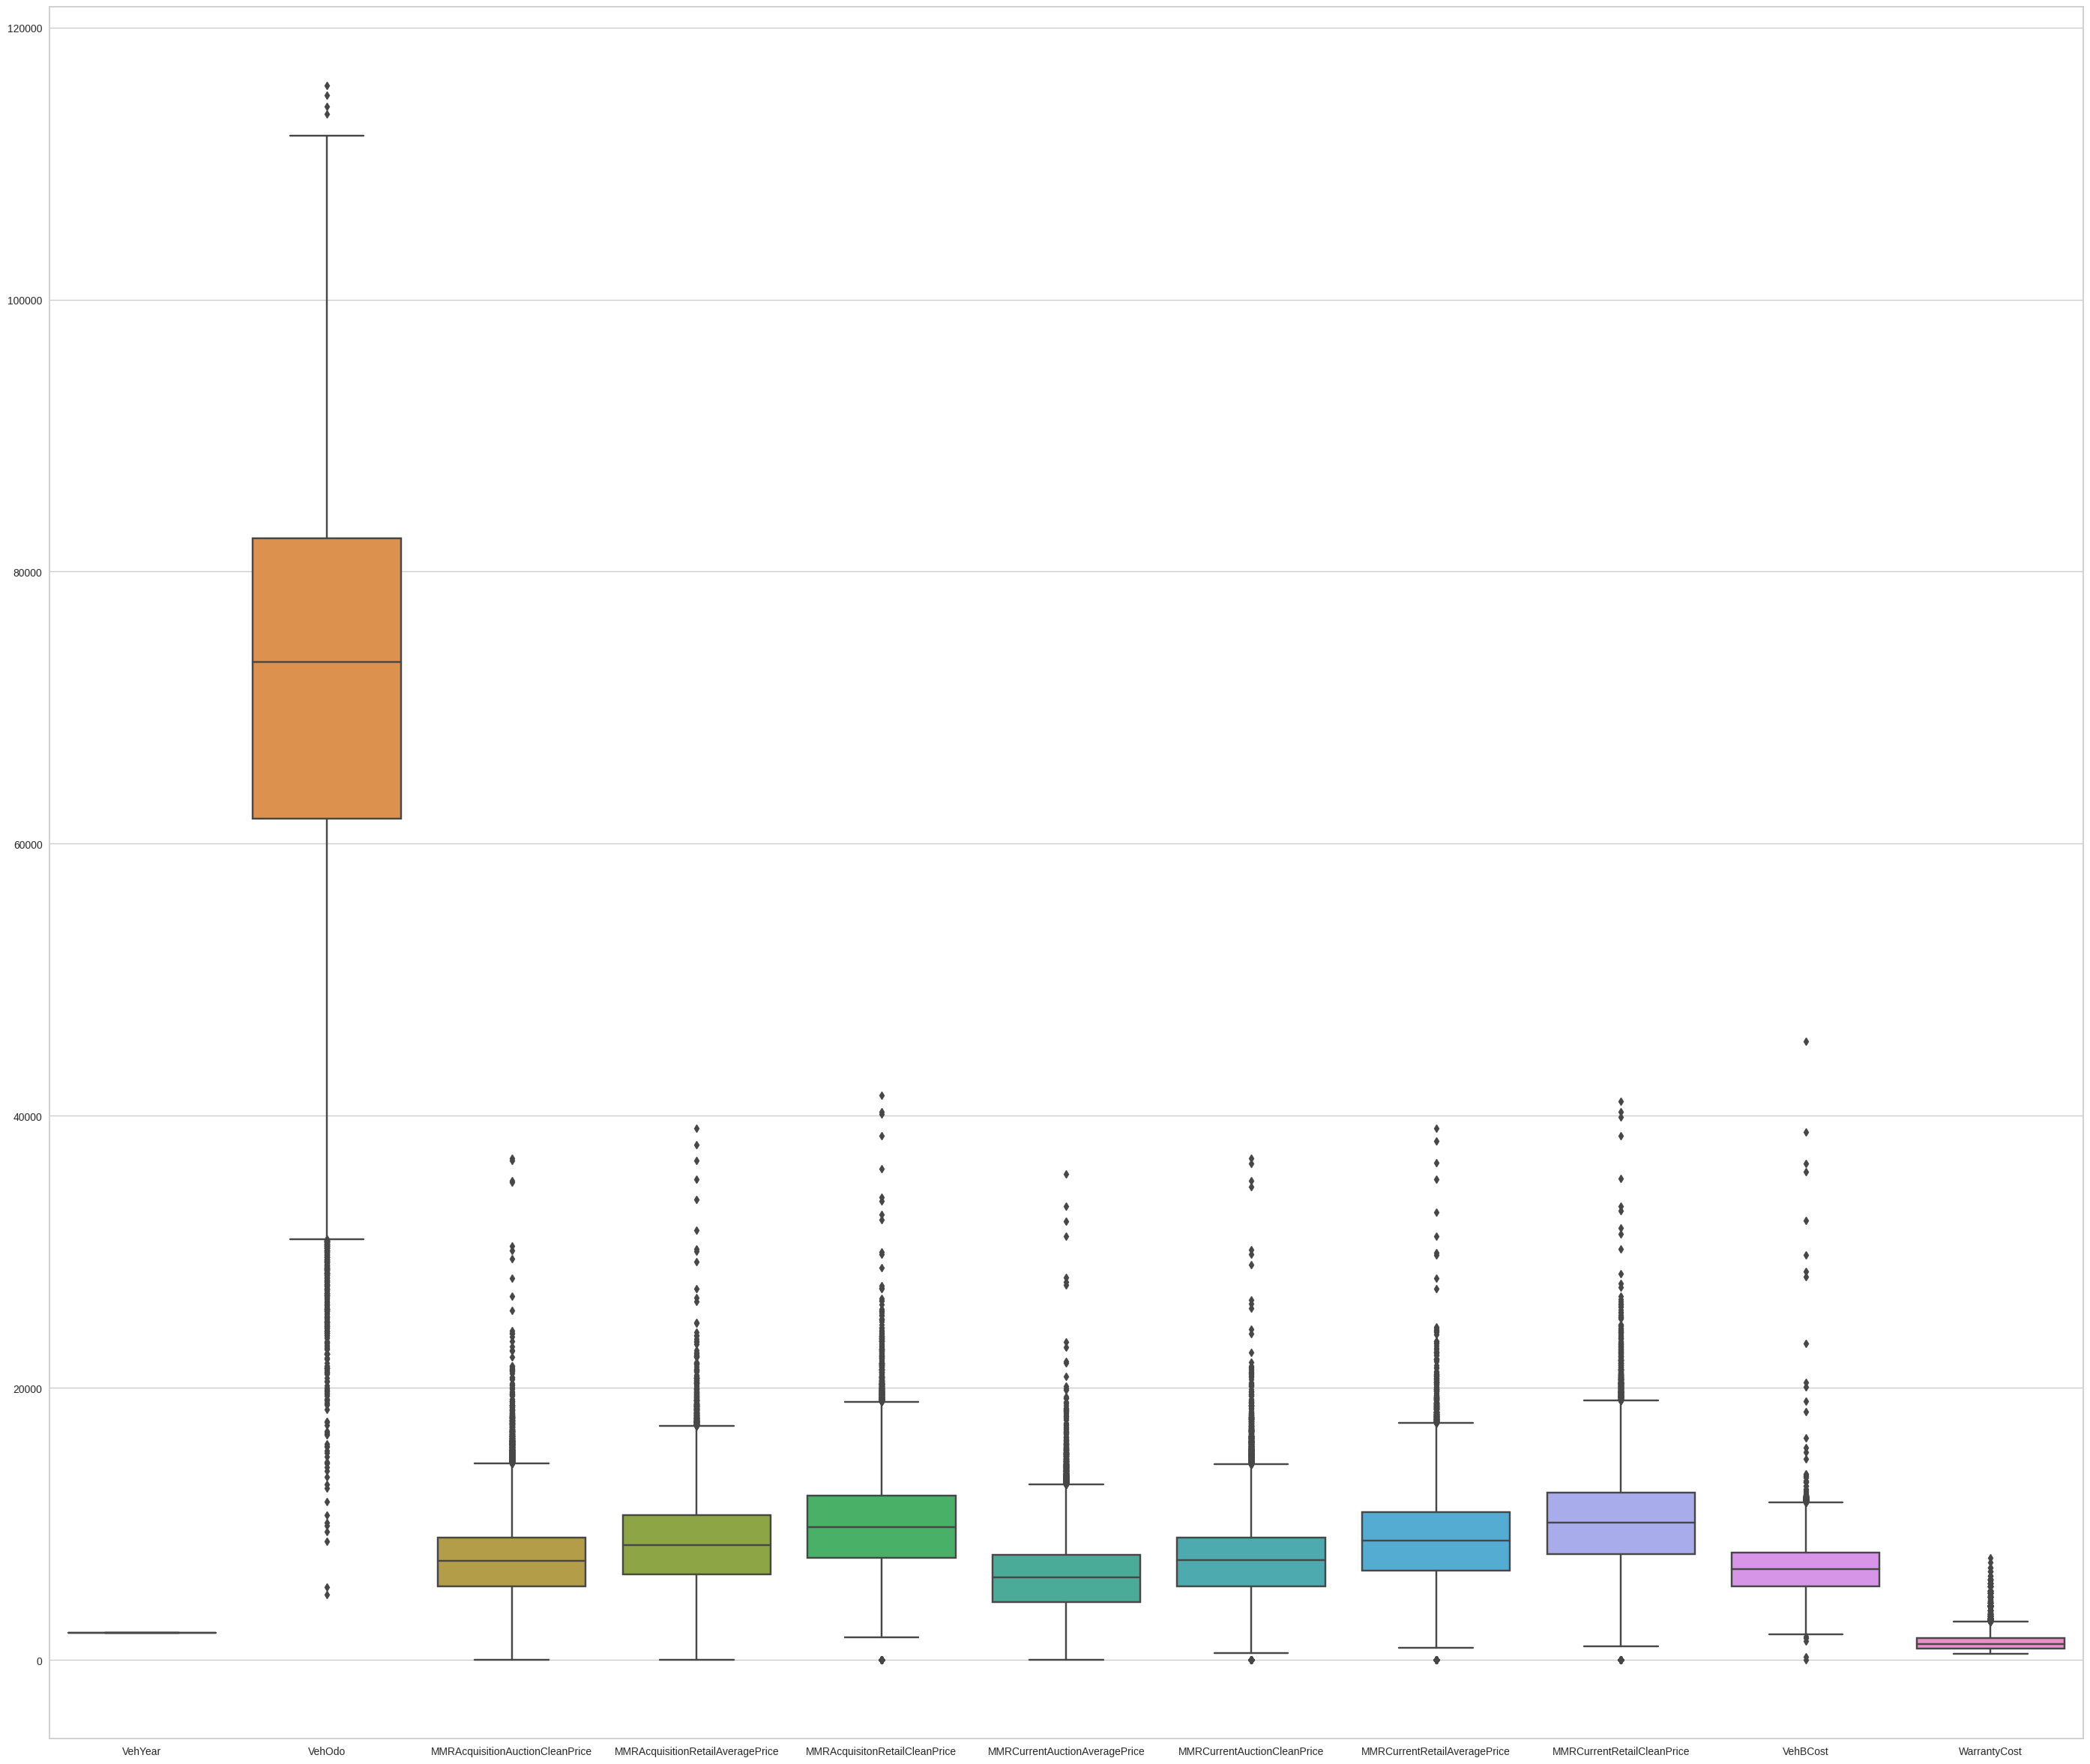

In [597]:
plt.figure(figsize=(35,30))
ax.set_xlabel("X Label", fontsize=100)
sns.boxplot(data=df_train[numerical_cols])

the above shows that feature have diffrent ranges and this would not be ideal for training the model and to obtain best model performance.

In [598]:
scaler=StandardScaler()

In [599]:
df_train[numerical_cols]=scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols]=scaler.transform(df_test[numerical_cols])

In [600]:
columns_to_drop = ['PRIMEUNIT', 'AUCGUART','RefId','WheelTypeID','VNST','VNZIP1','IsOnlineSale','BYRNO','VehicleAge','MMRAcquisitionAuctionAveragePrice','Model','SubModel','Trim','PurchDate']
df_test = df_test.drop(columns_to_drop, axis=1)

All the feature dropped on train set is dropped in test set as well.

<Axes: >

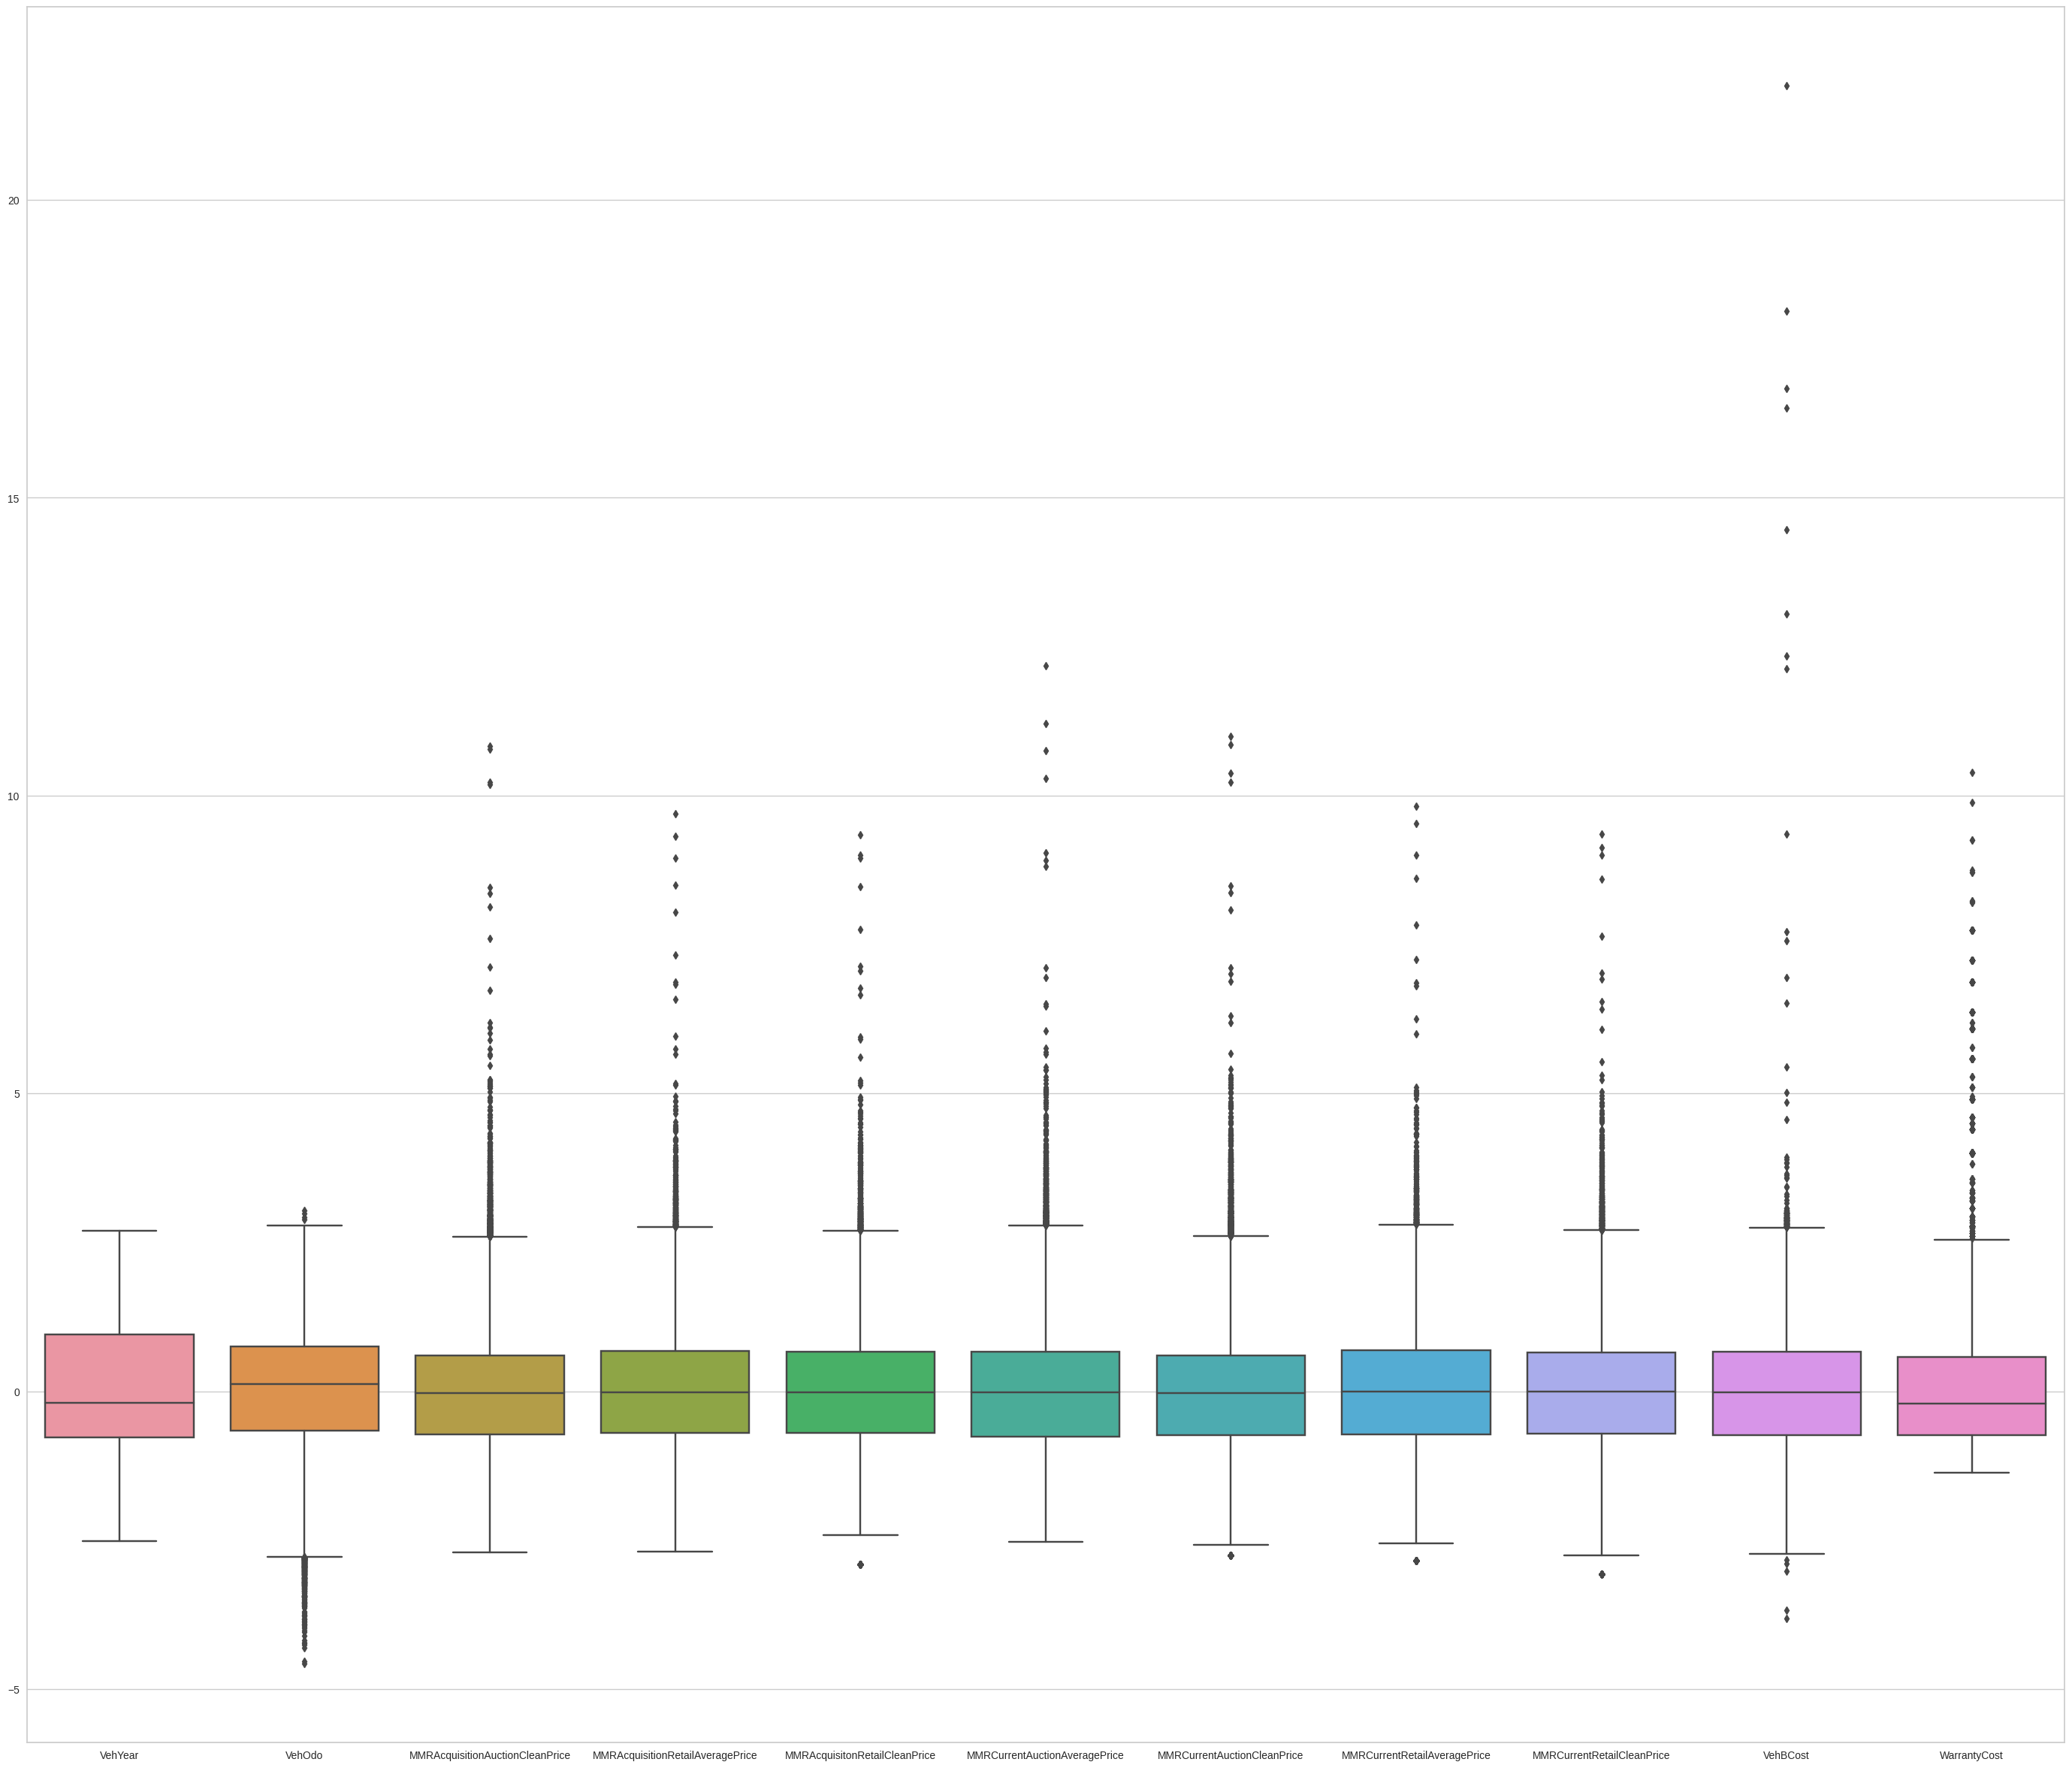

In [601]:
plt.figure(figsize=(35,30))
ax.set_xlabel("X Label", fontsize=100)
sns.boxplot(data=df_train[numerical_cols])

We are standard scalling all the values in both df_train and df_test

Why Standardise? Standardization is normalizing data to the same scale.

Why Normalize?

Different features are in different ranges and have different units. To approach the convergence to global minima faster for the gradient Descent.

Also the same Standardaization technique used on the Training set has to be applied to the Test set. hence we just use transform() on df_test rather fit_transform()

After standardization we see all the values are in same range

<Axes: >

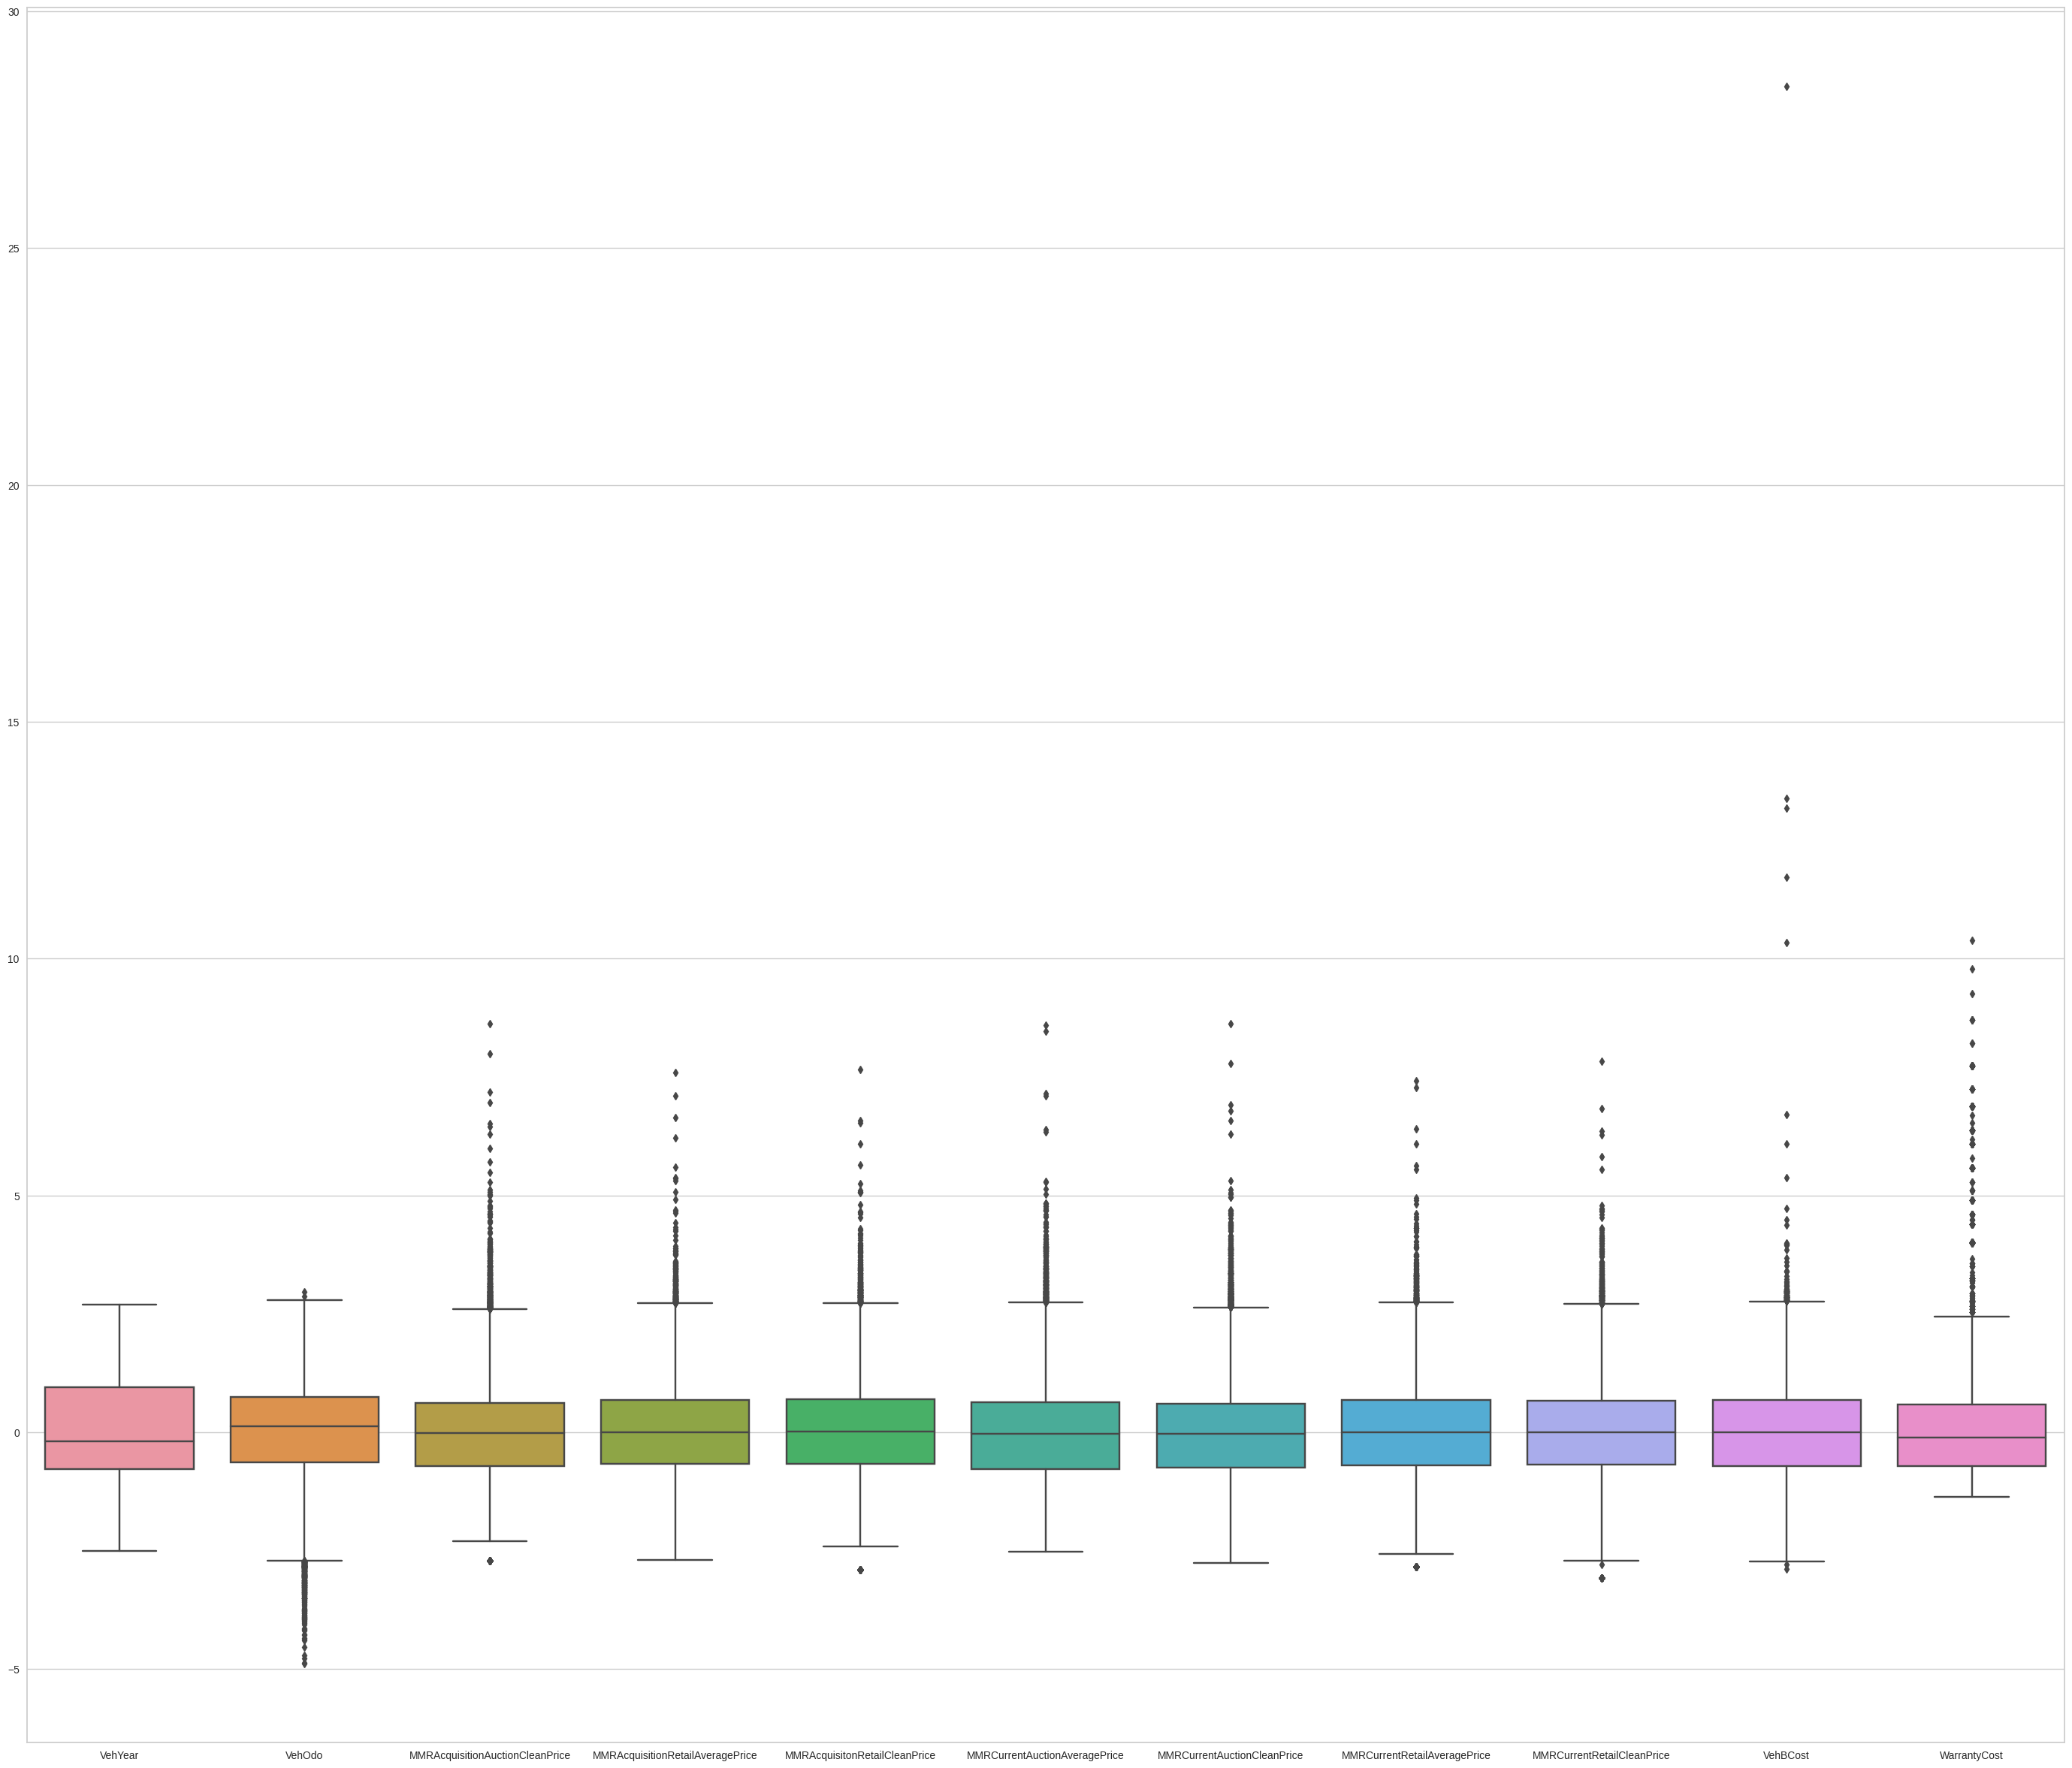

In [602]:
plt.figure(figsize=(35,30))
ax.set_xlabel("X Label", fontsize=100)
sns.boxplot(data=df_test[numerical_cols])

## Catagorical Data Encoding 

In [603]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df_train[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', max_categories=None, min_frequency=None,
              sparse=False, sparse_output=False)

We convert catagorical values to numeric values as model not under stand 'Object' values and for this we are using a techniques call OneHotEncoding by sklearn

In [604]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [605]:
df_train[encoded_cols] = encoder.transform(df_train[categorical_cols])
df_test[encoded_cols] = encoder.transform(df_test[categorical_cols])

In [606]:
X_train=pd.concat([df_train[encoded_cols],df_train[numerical_cols]],axis=1)

In [607]:
y_train = pd.DataFrame(df_train["IsBadBuy"])

In [608]:
X_test=pd.concat([df_test[encoded_cols],df_test[numerical_cols]],axis=1)

finally we have a fully furnished Data set with encoded and imputed values.

## Data Up -Sampling 

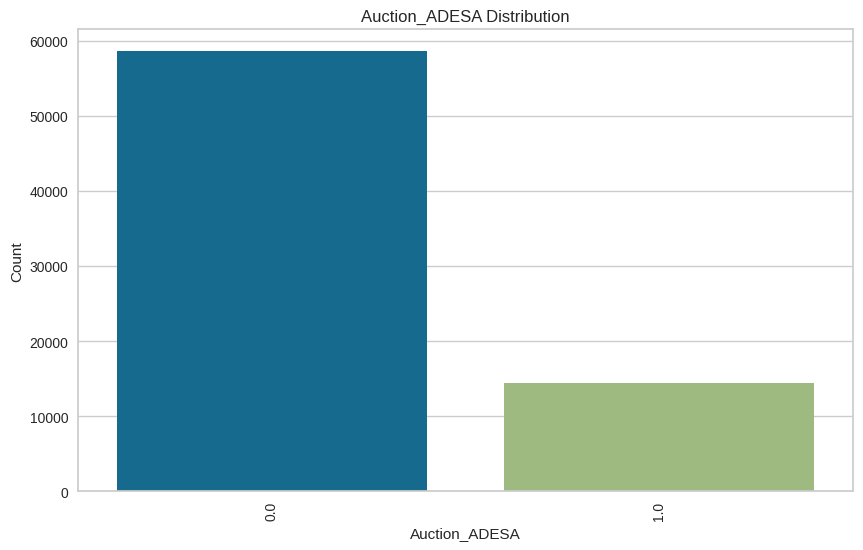

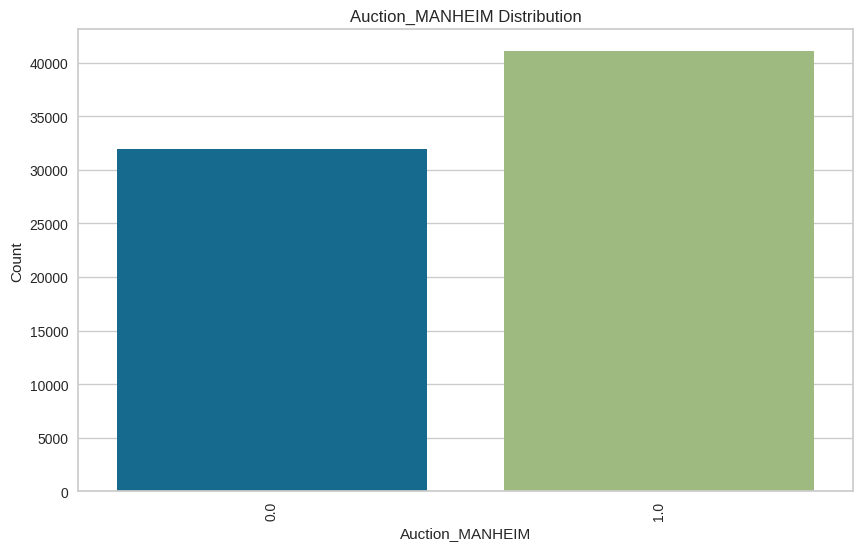

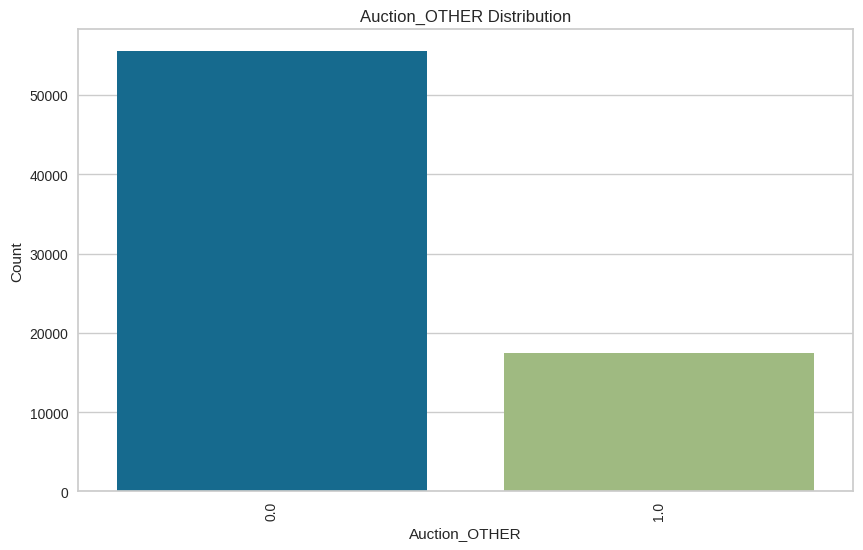

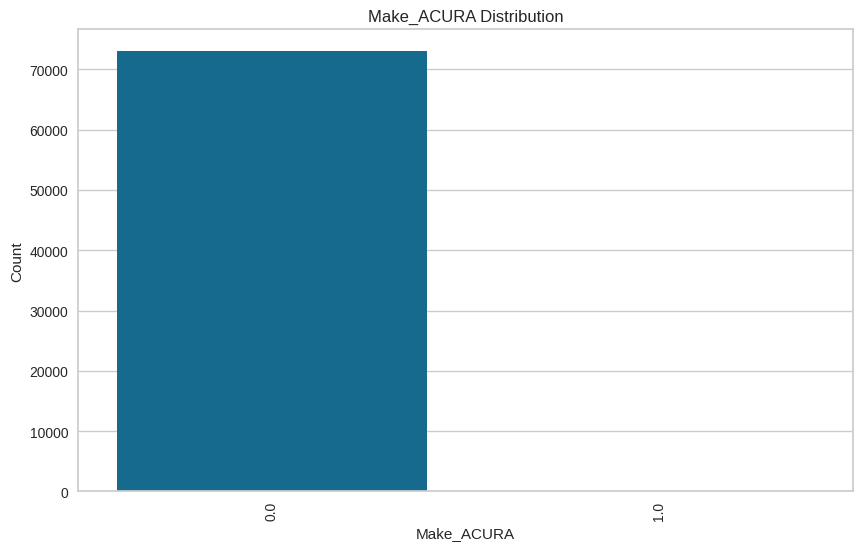

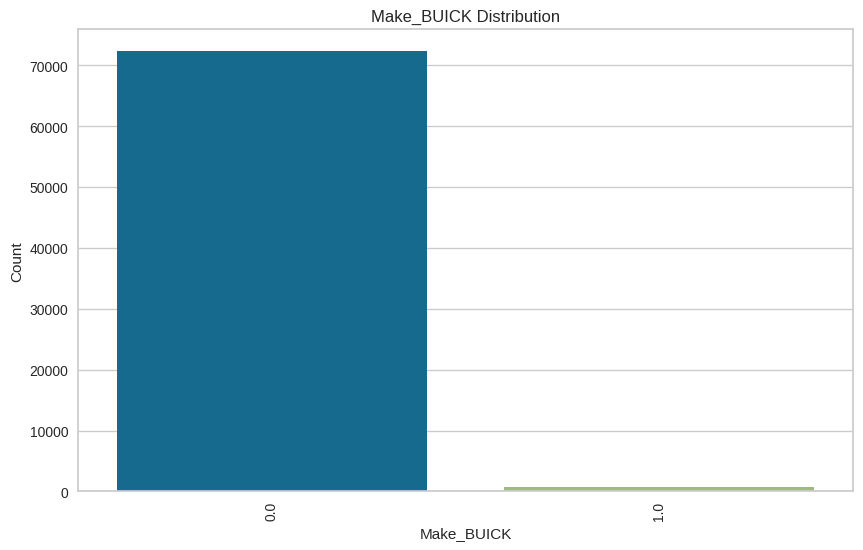

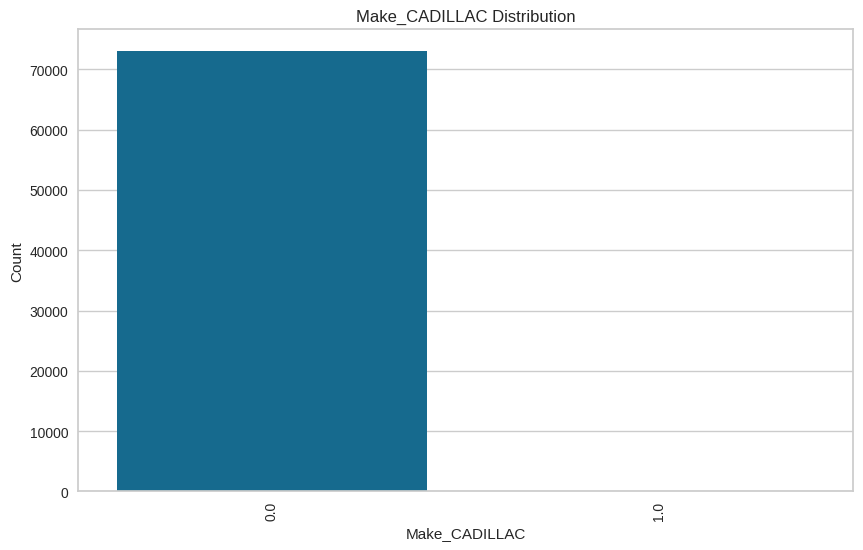

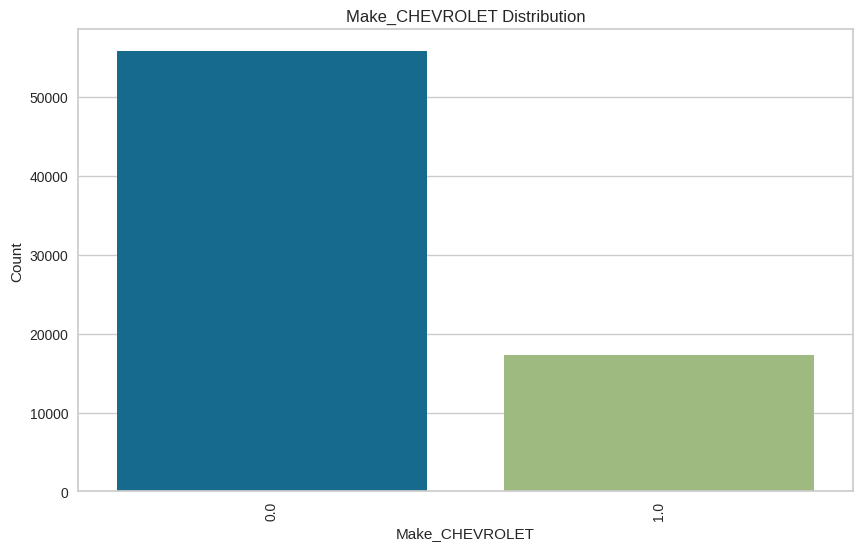

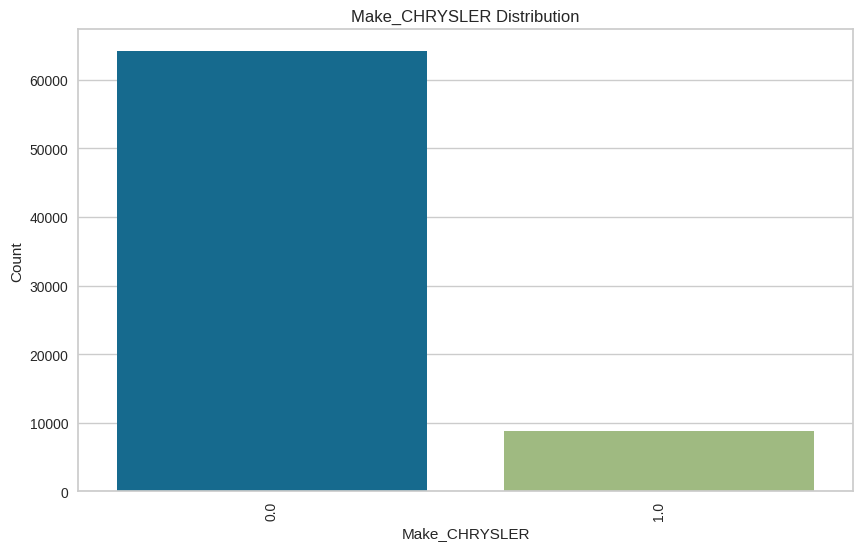

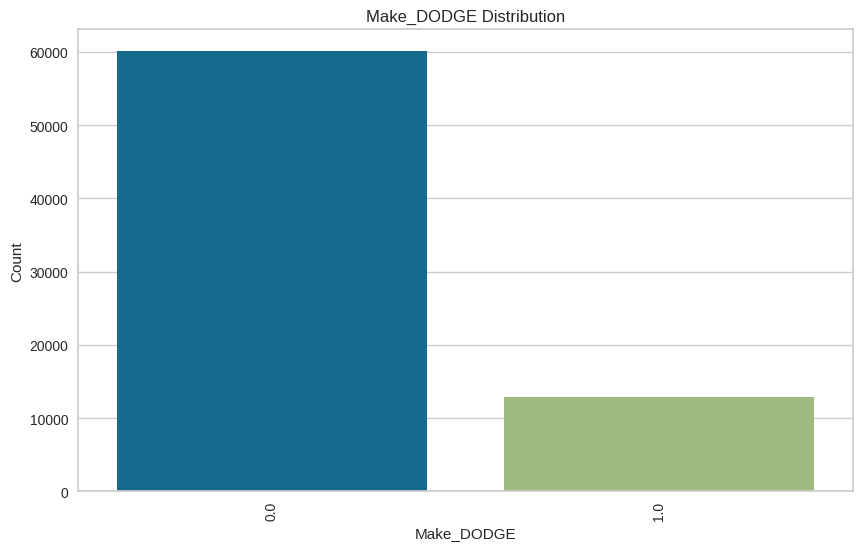

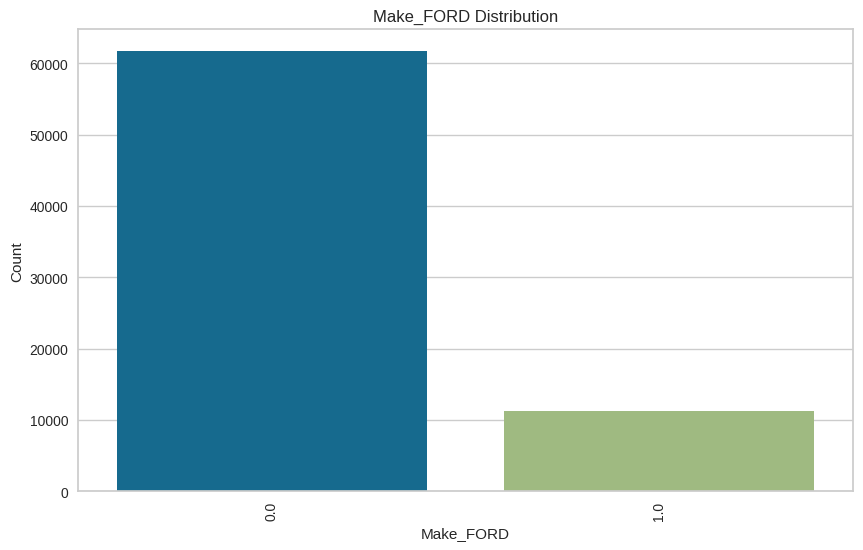

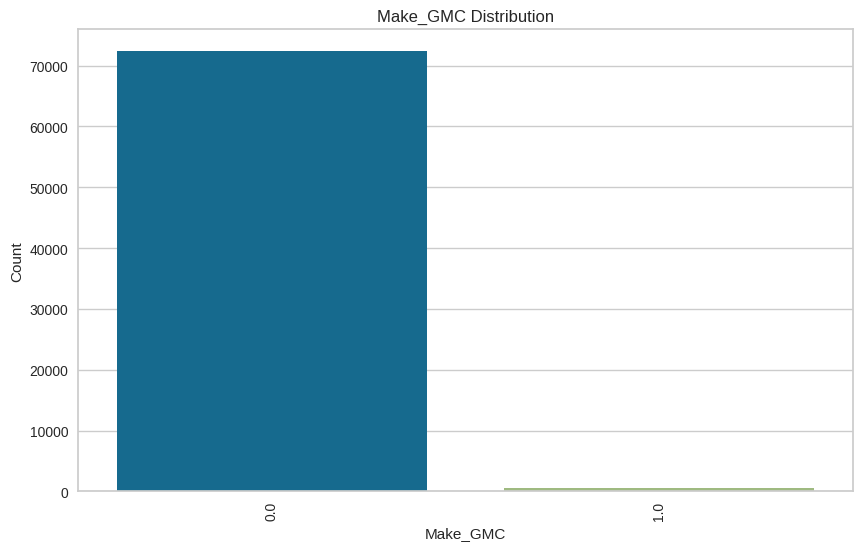

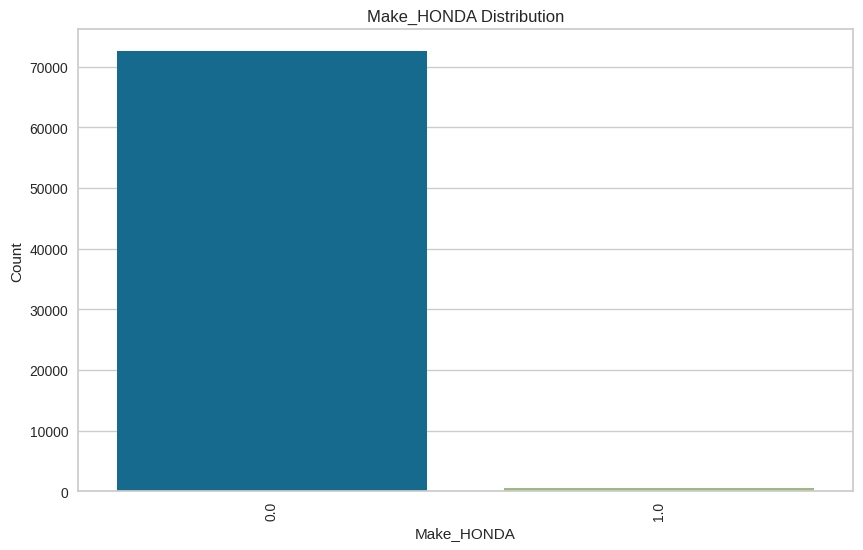

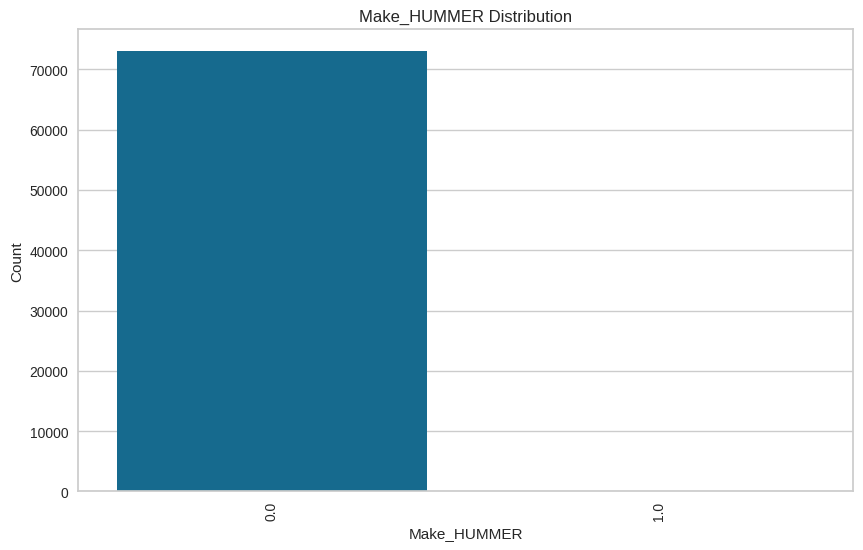

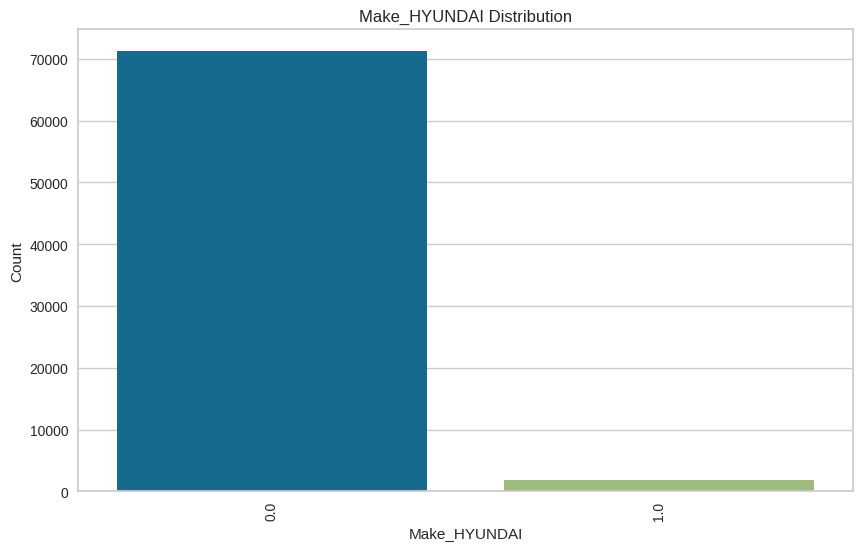

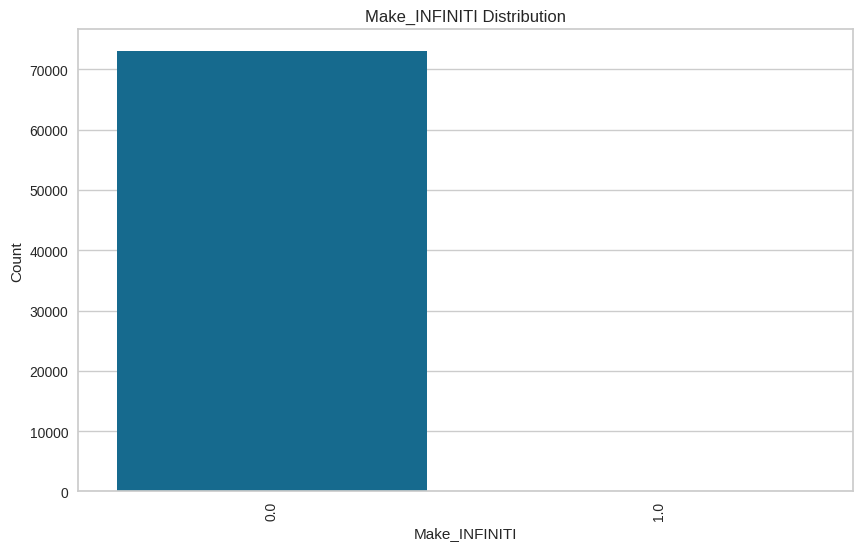

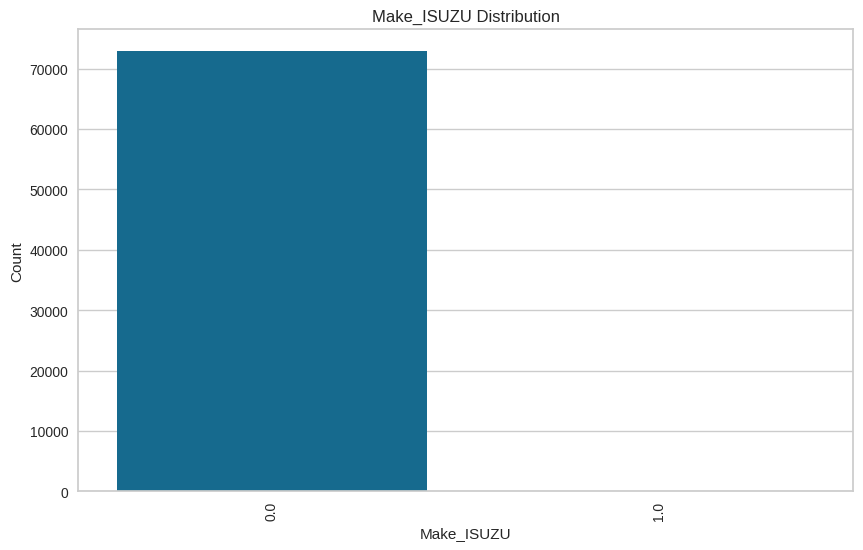

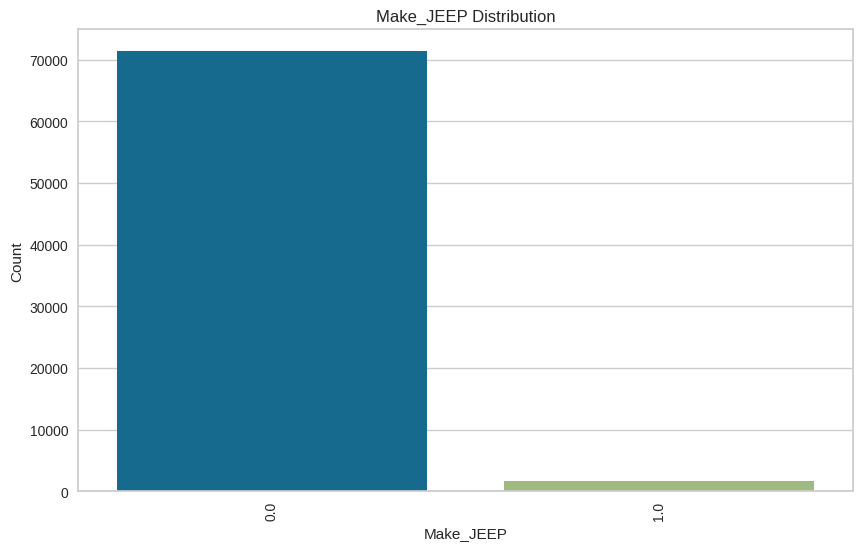

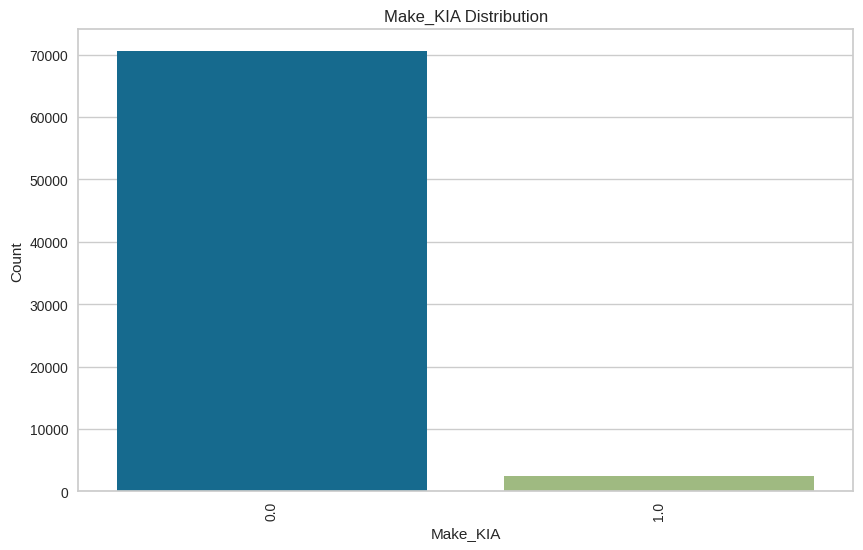

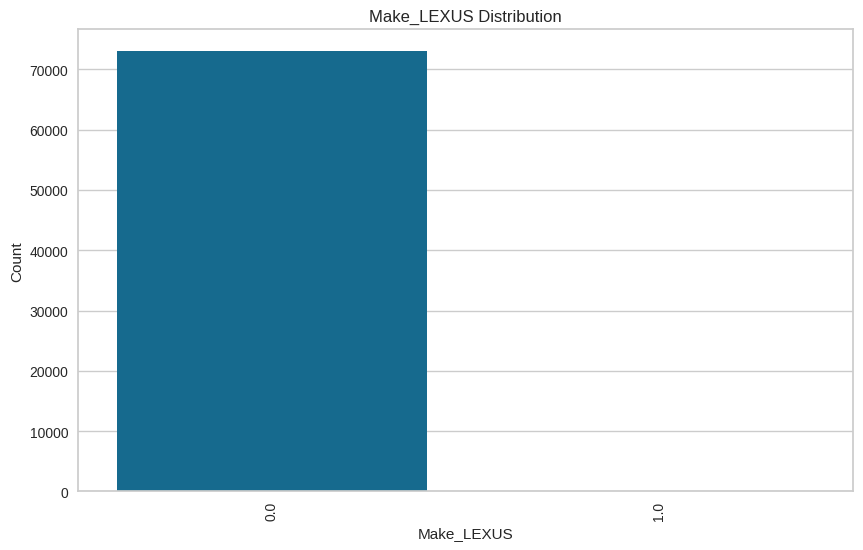

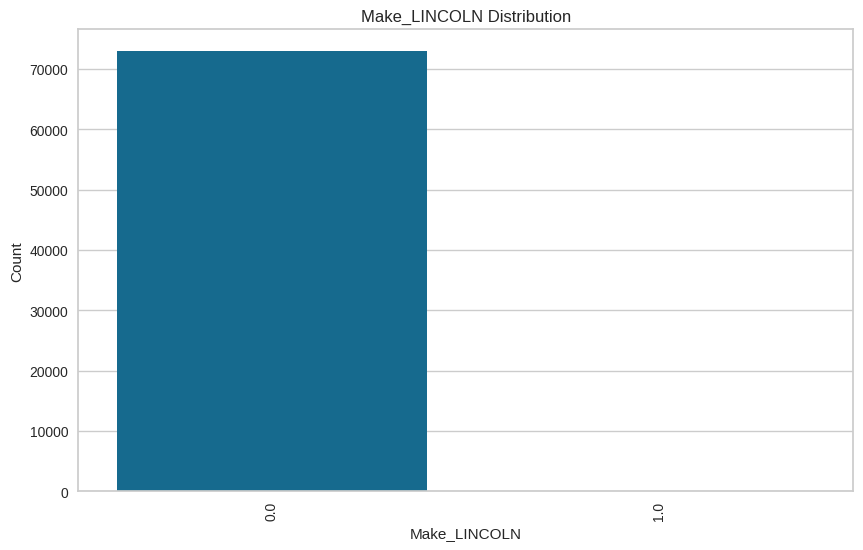

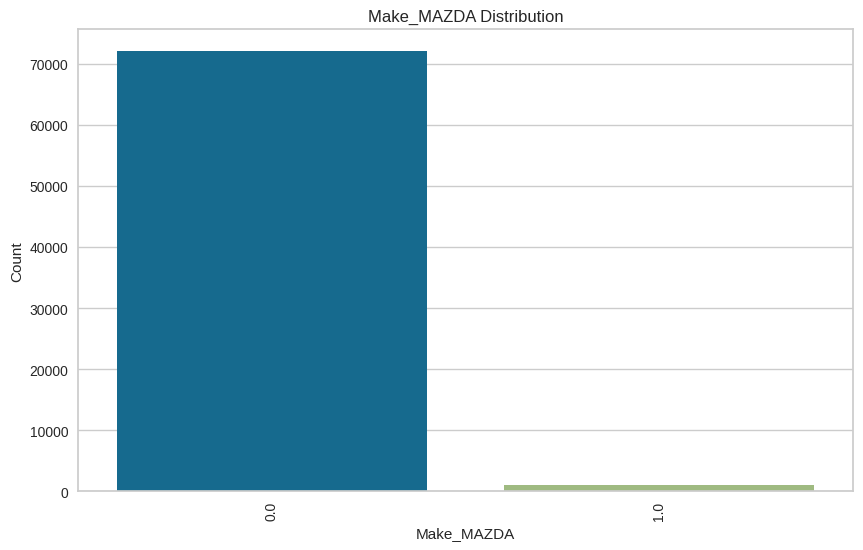

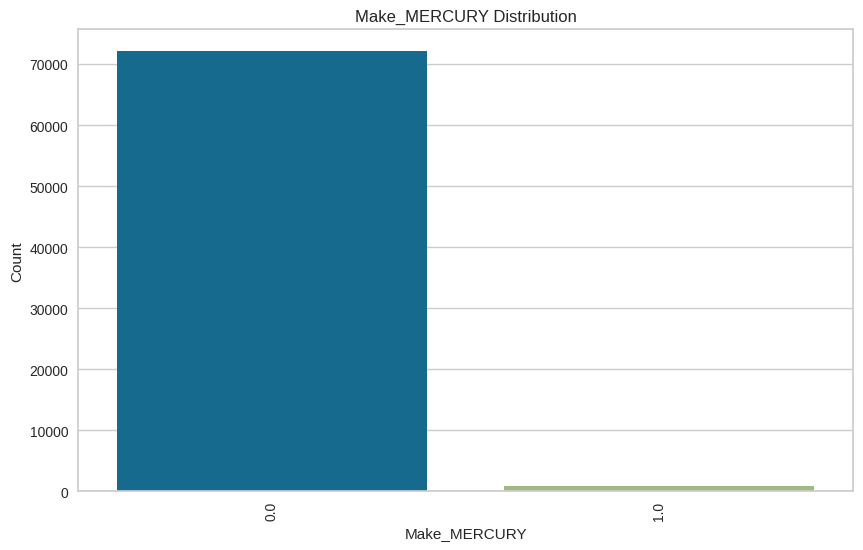

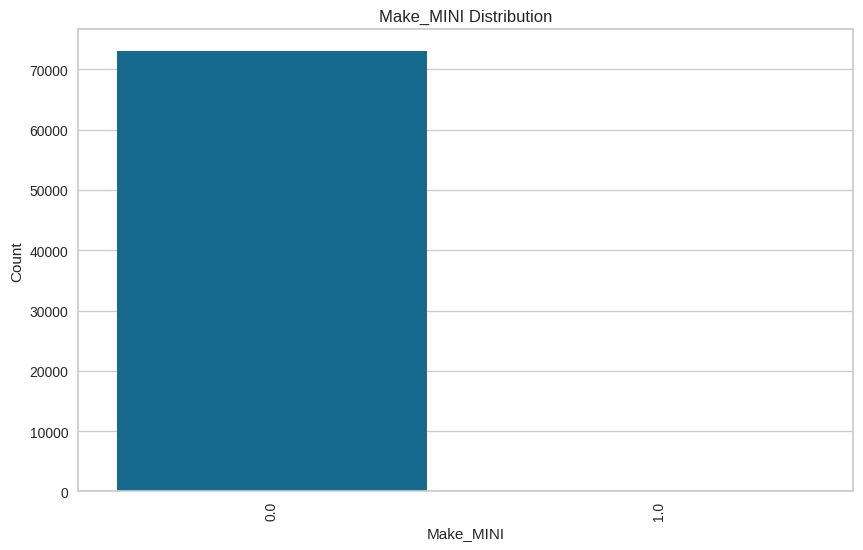

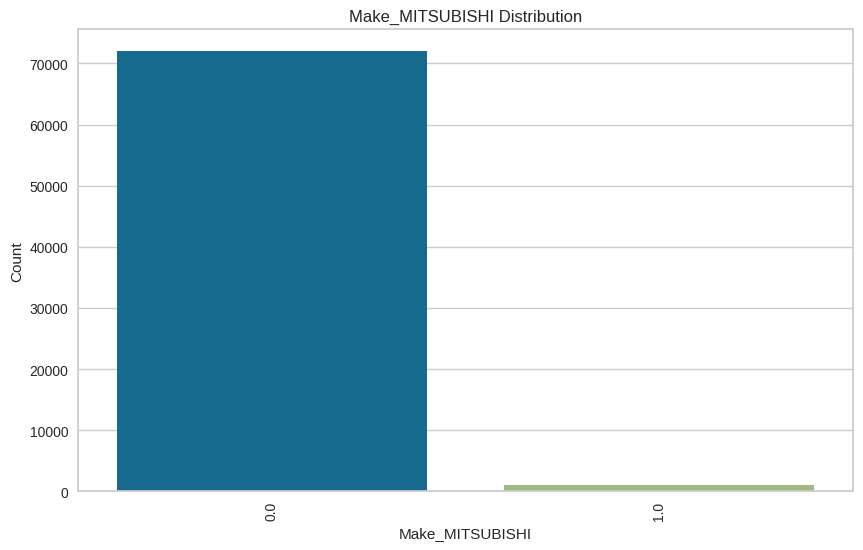

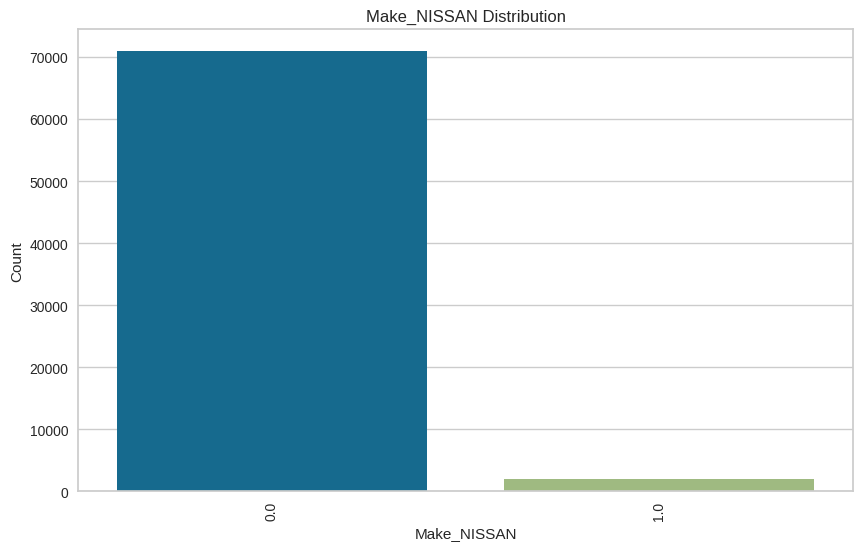

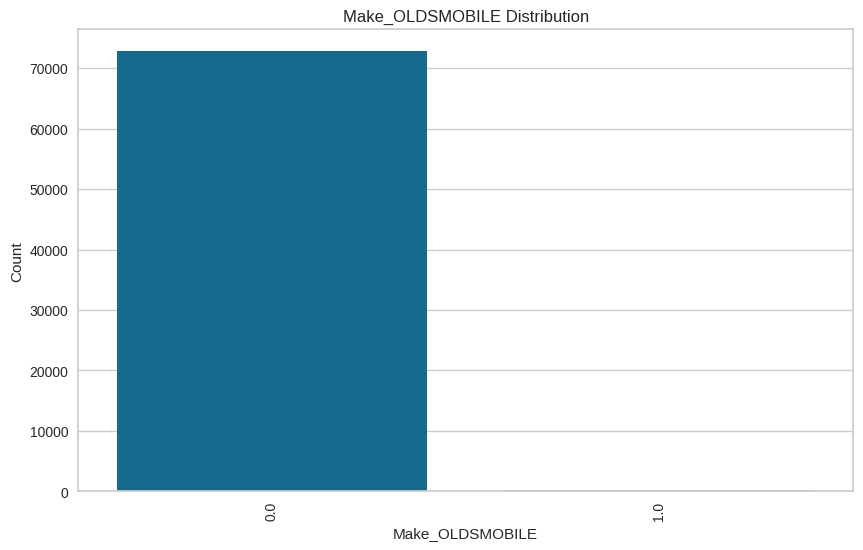

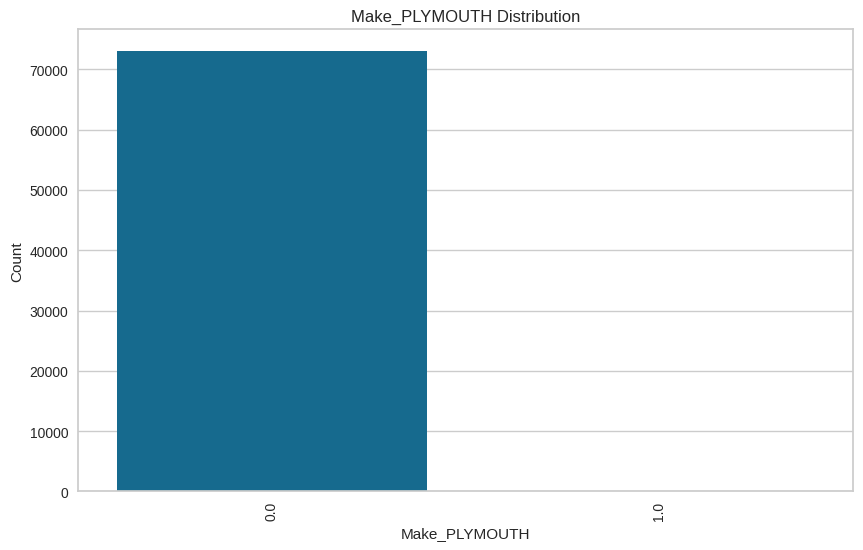

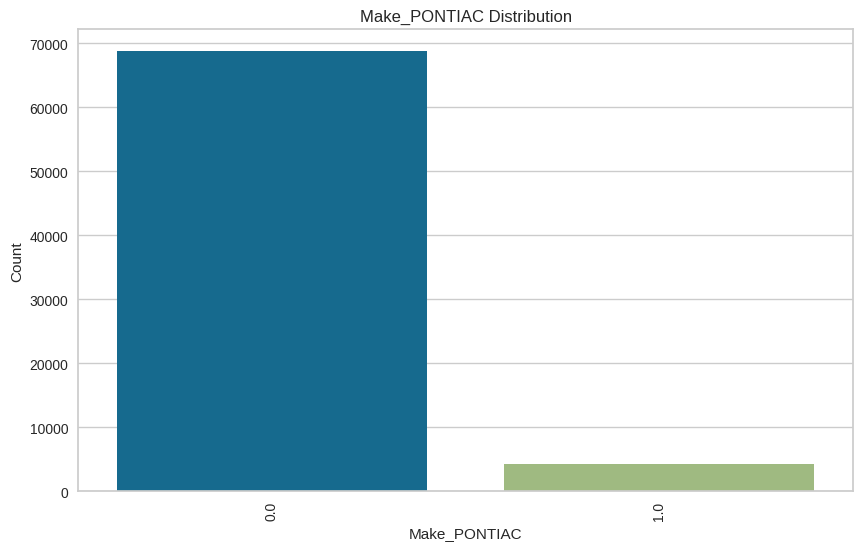

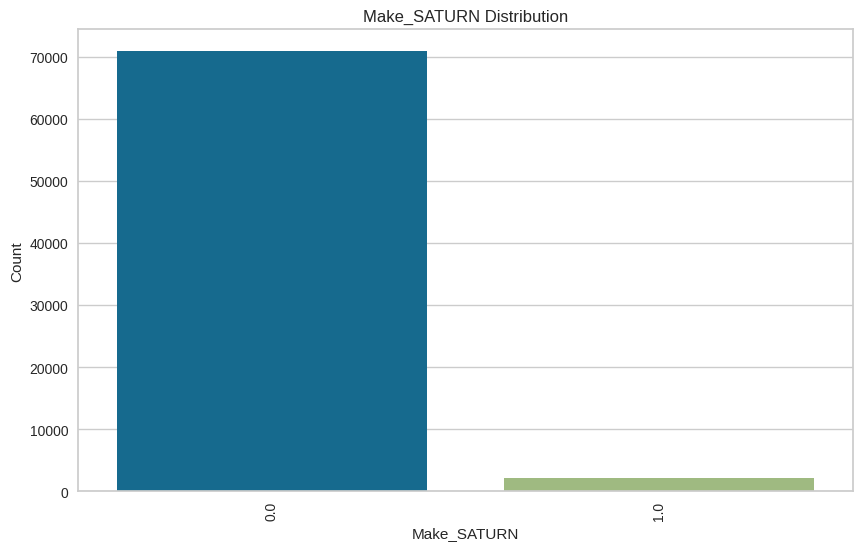

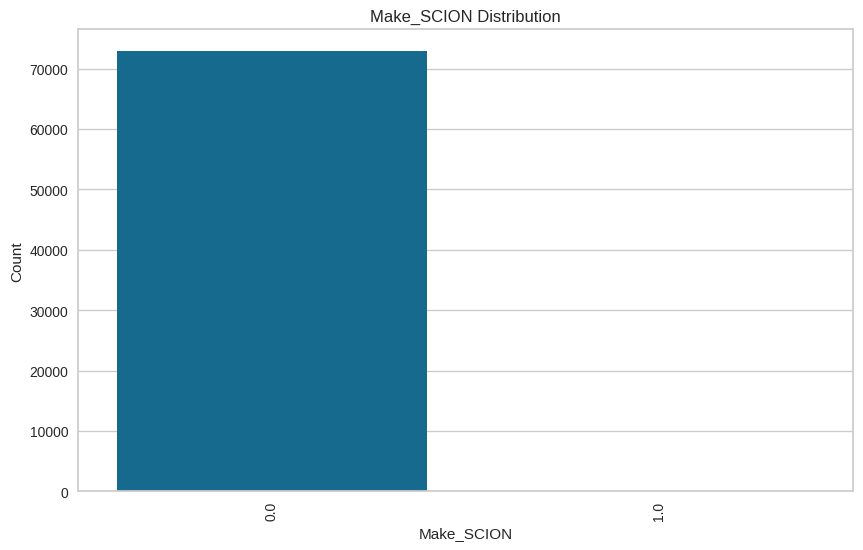

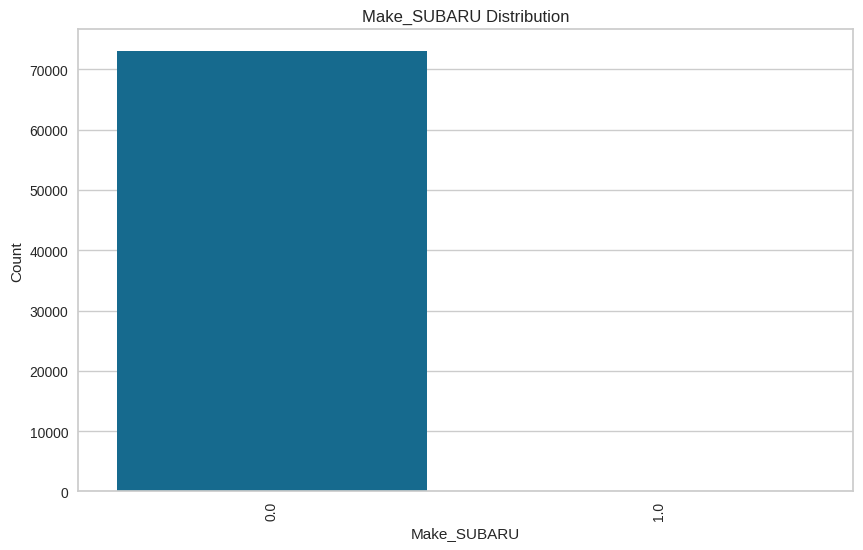

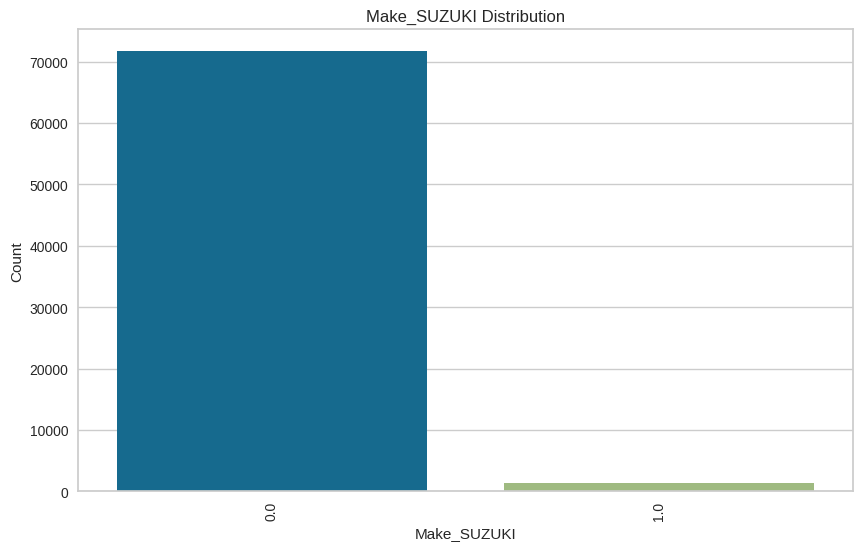

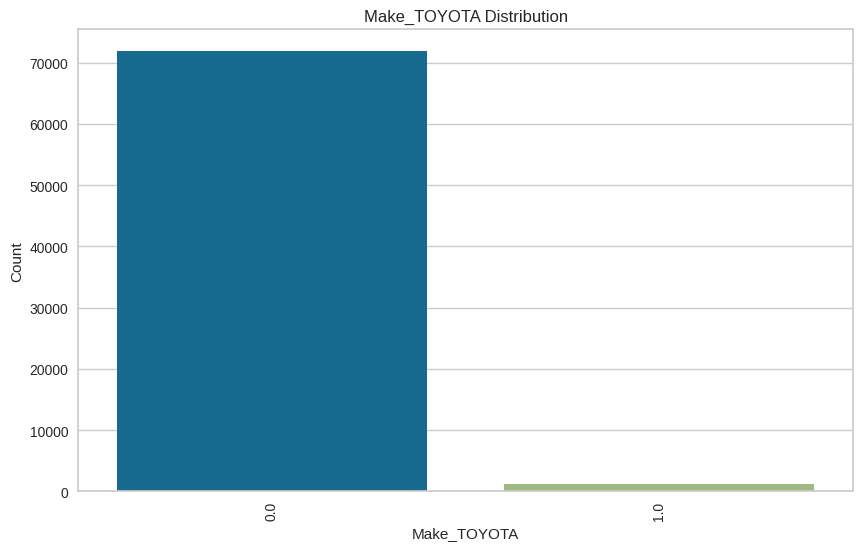

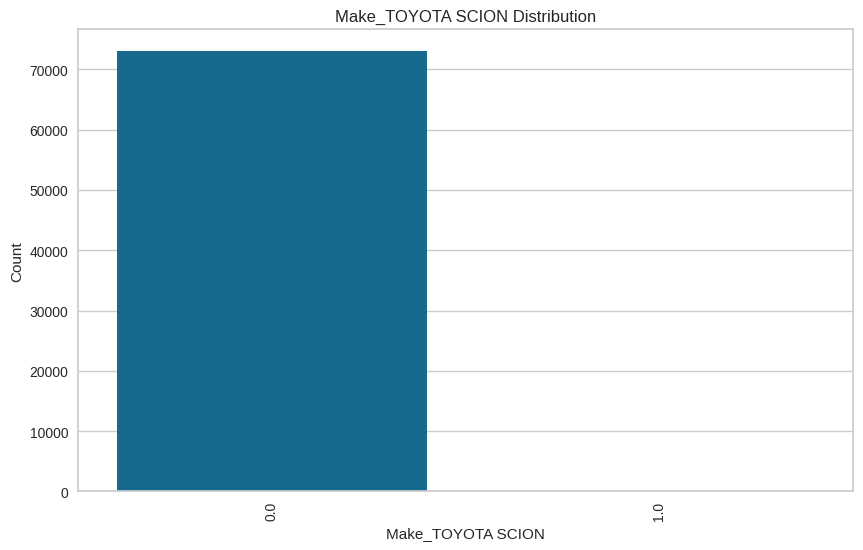

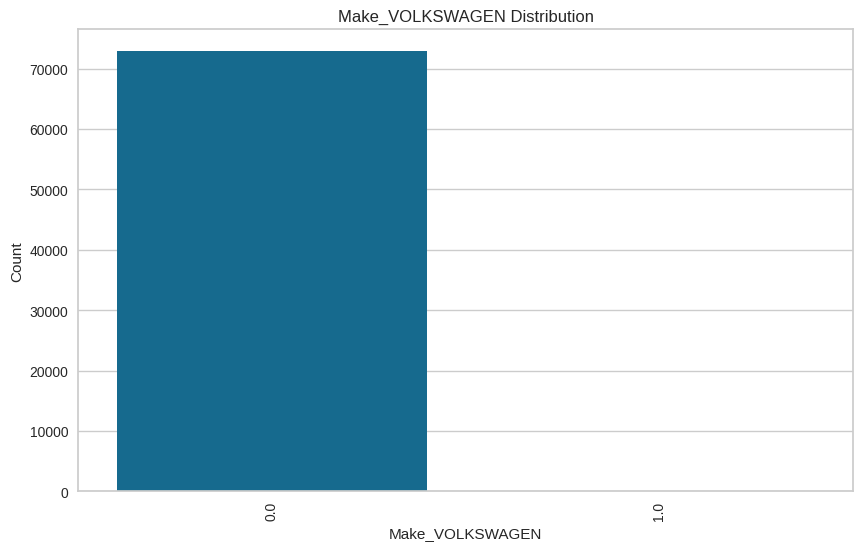

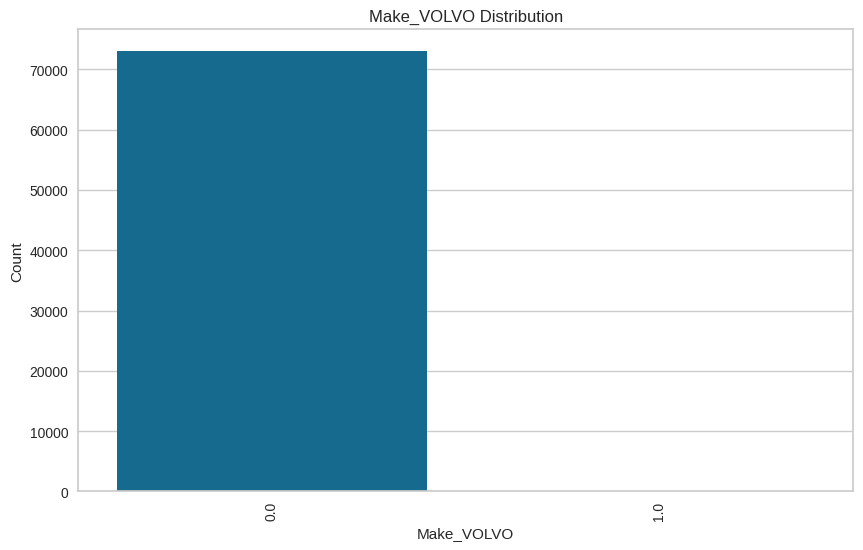

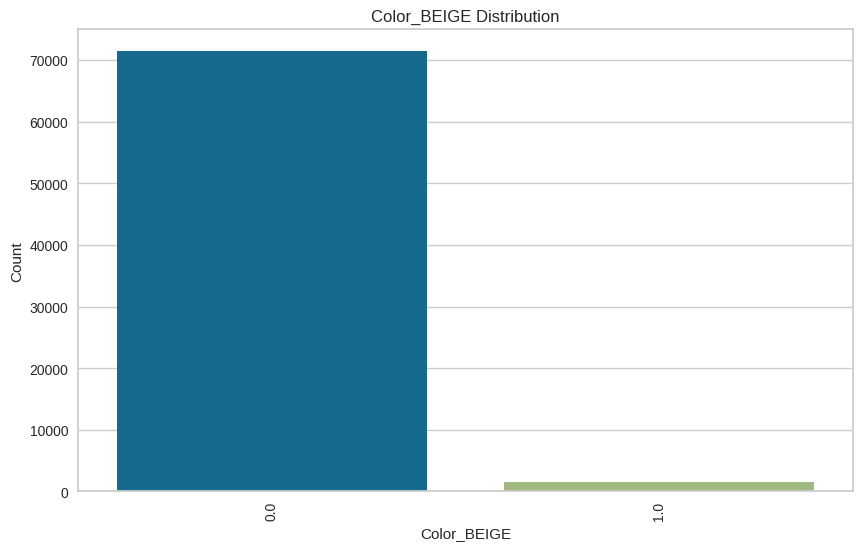

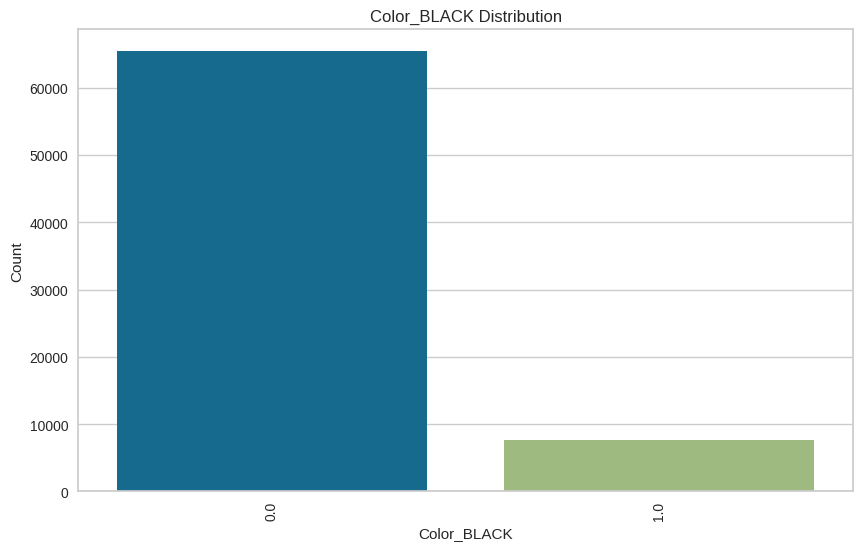

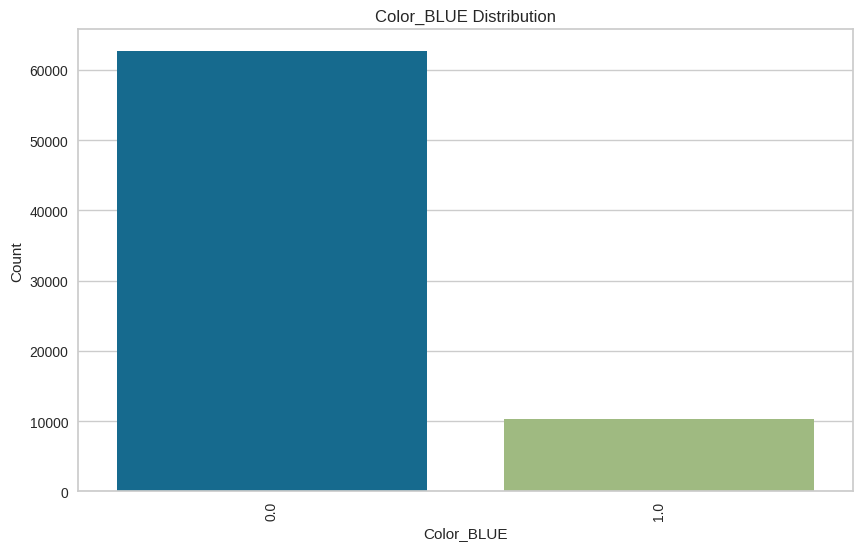

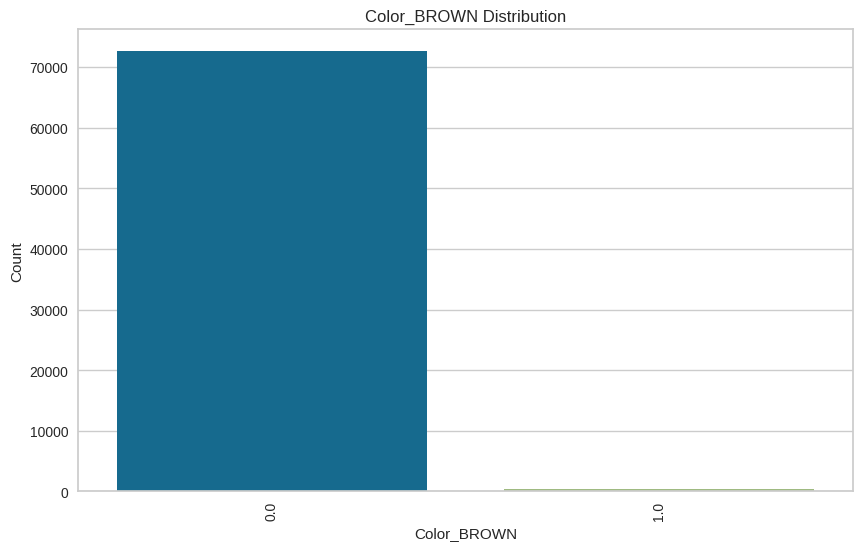

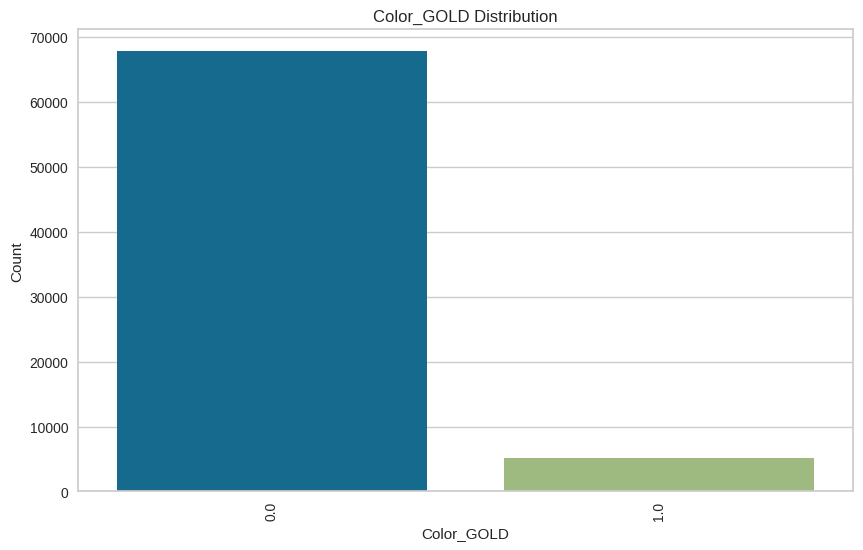

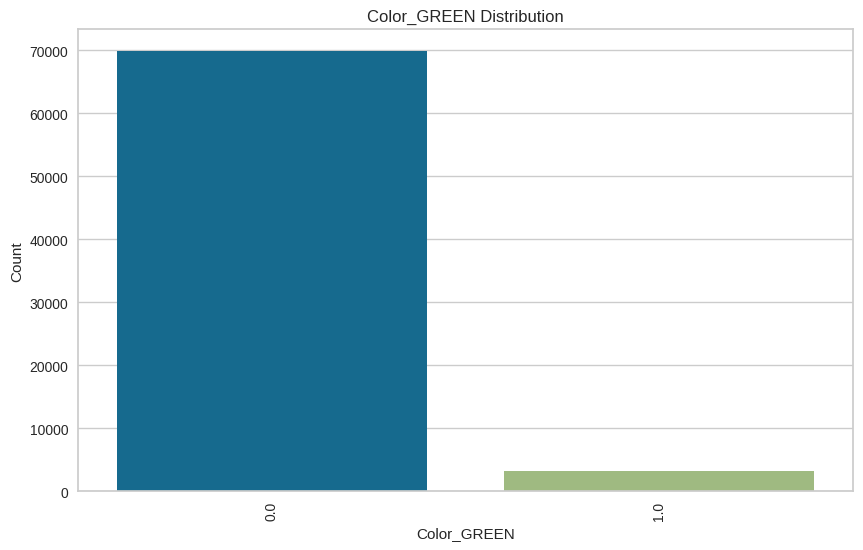

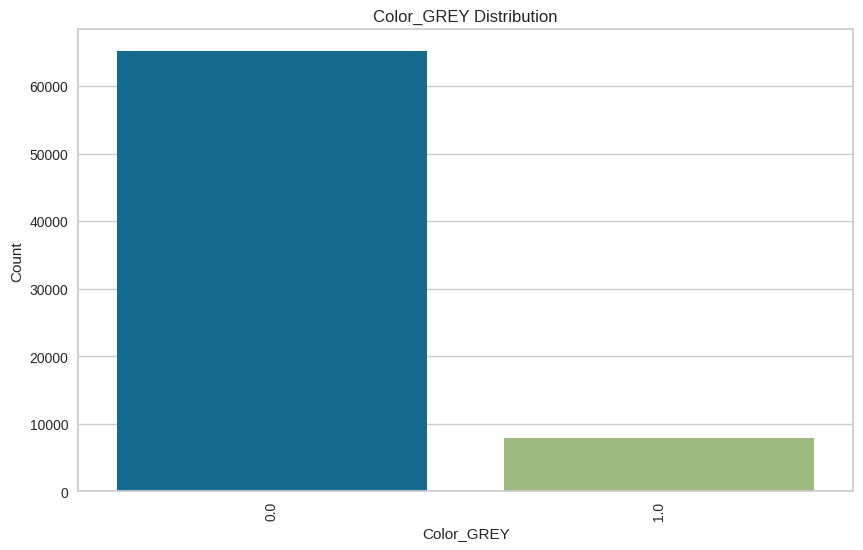

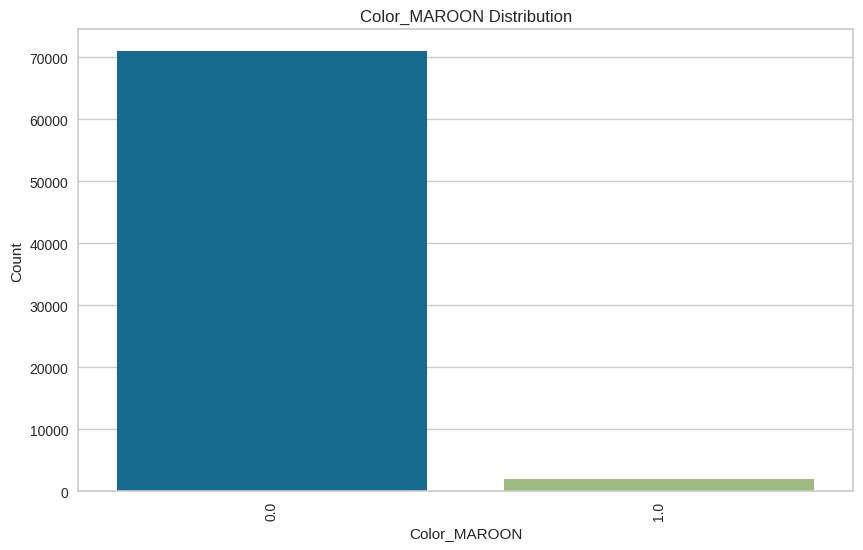

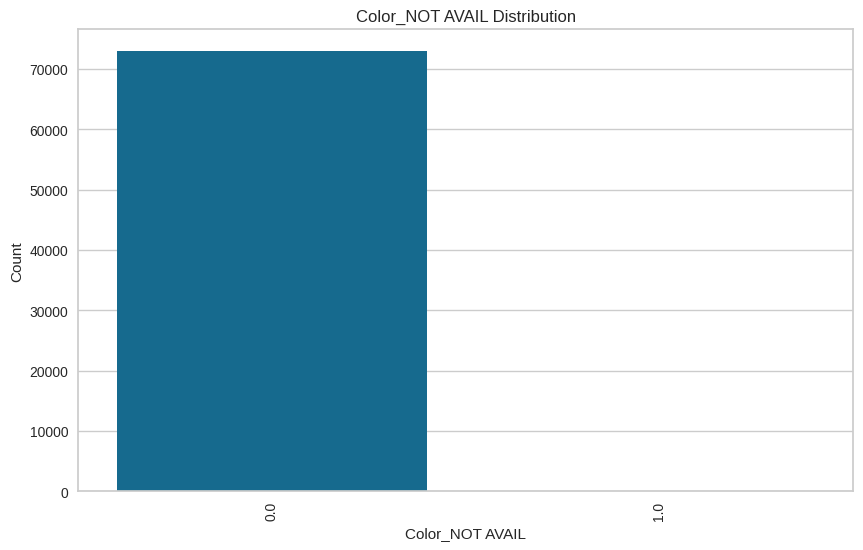

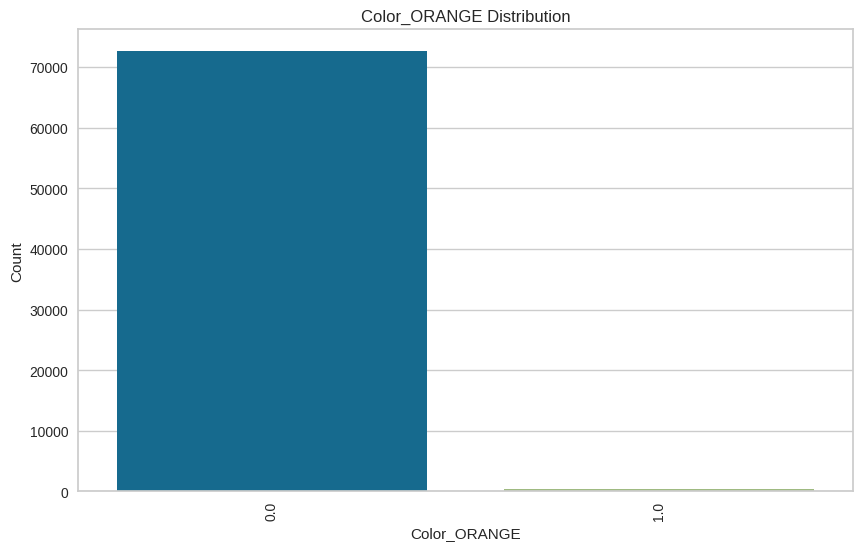

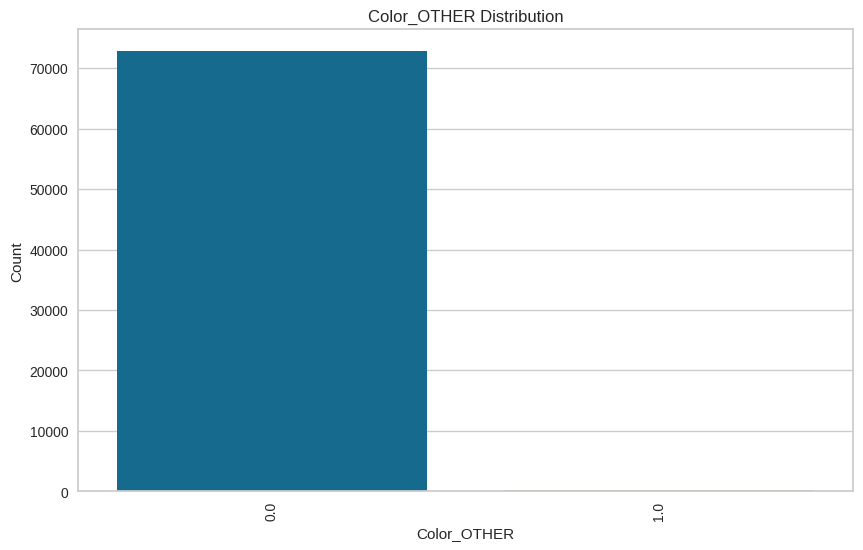

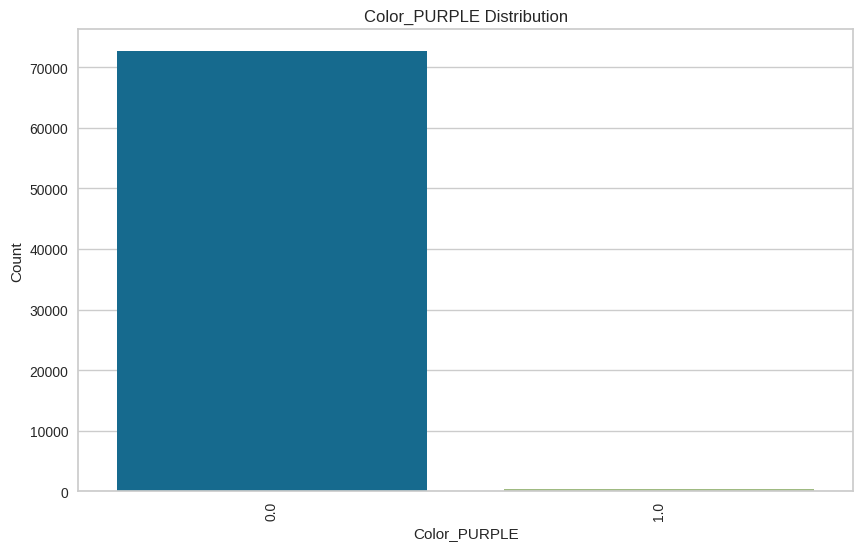

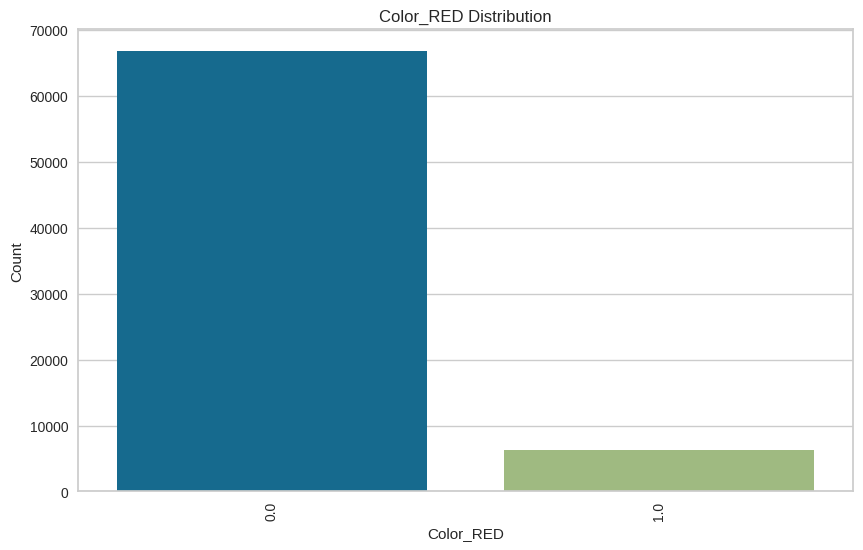

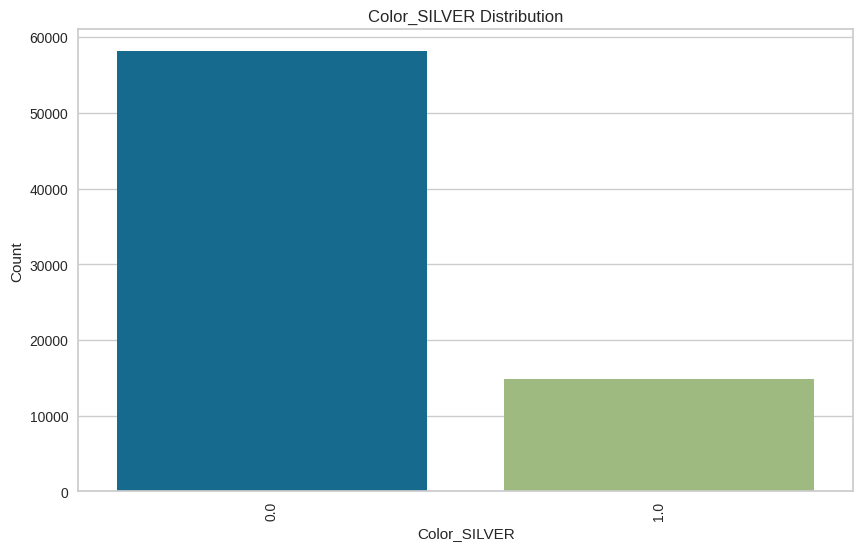

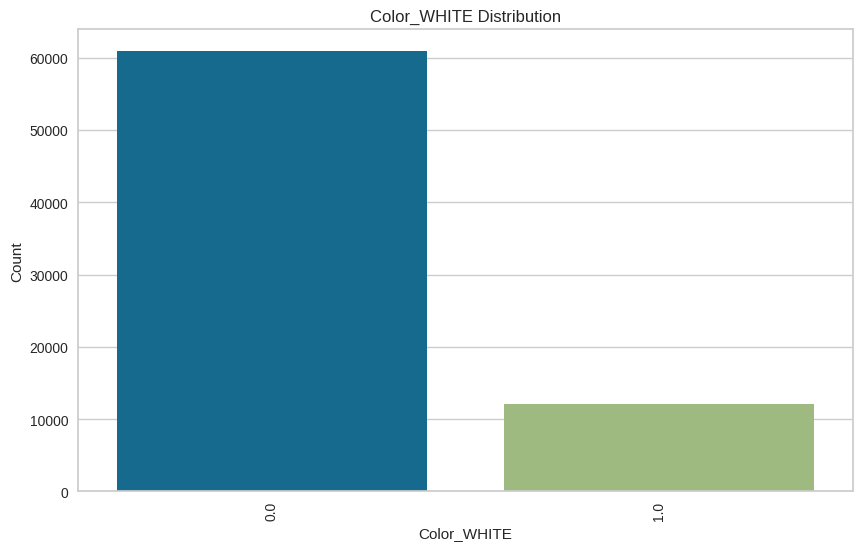

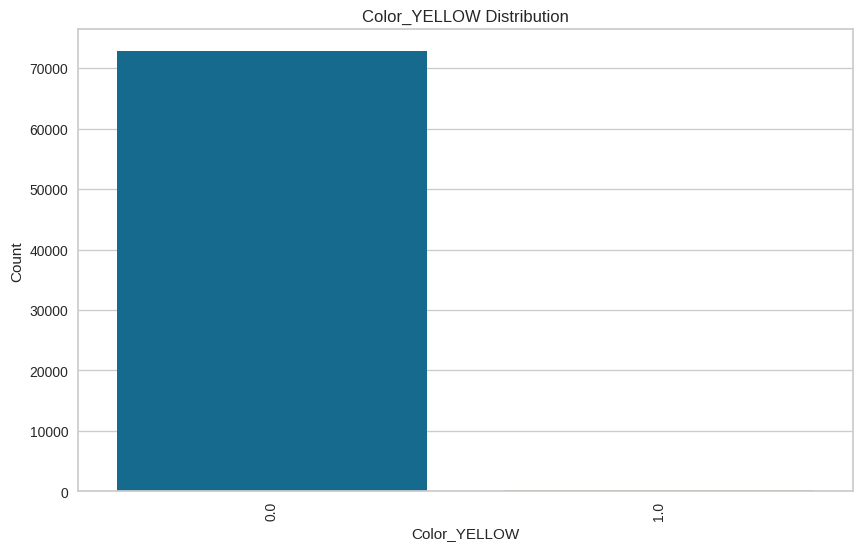

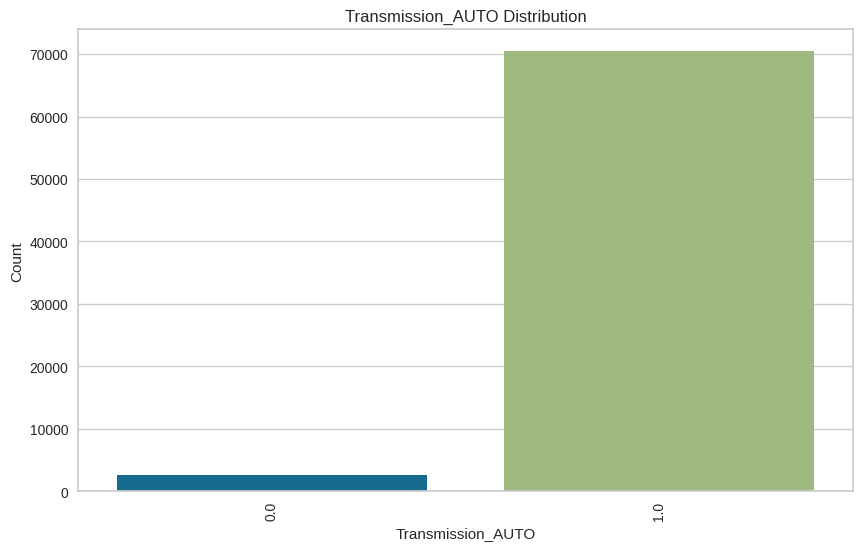

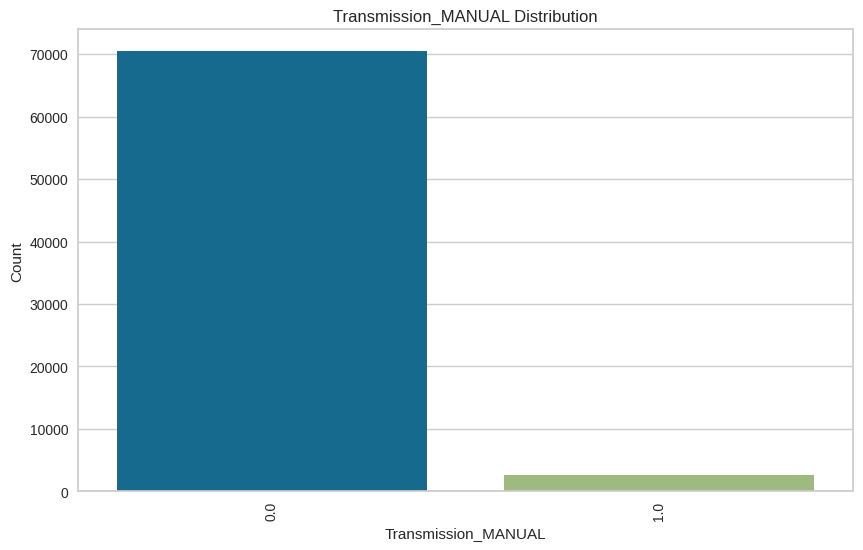

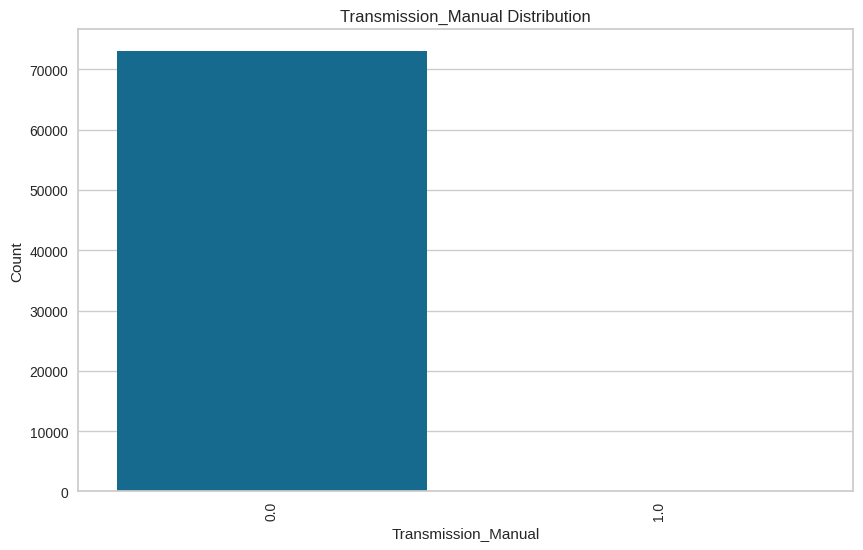

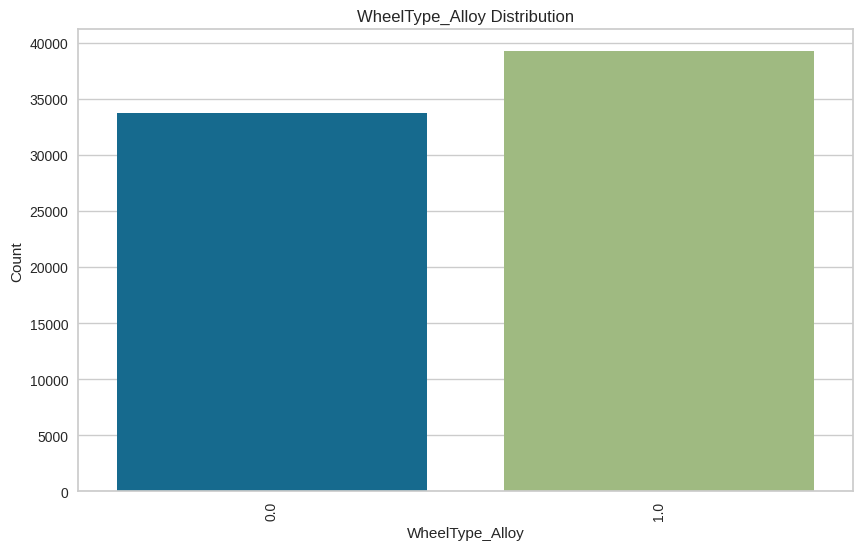

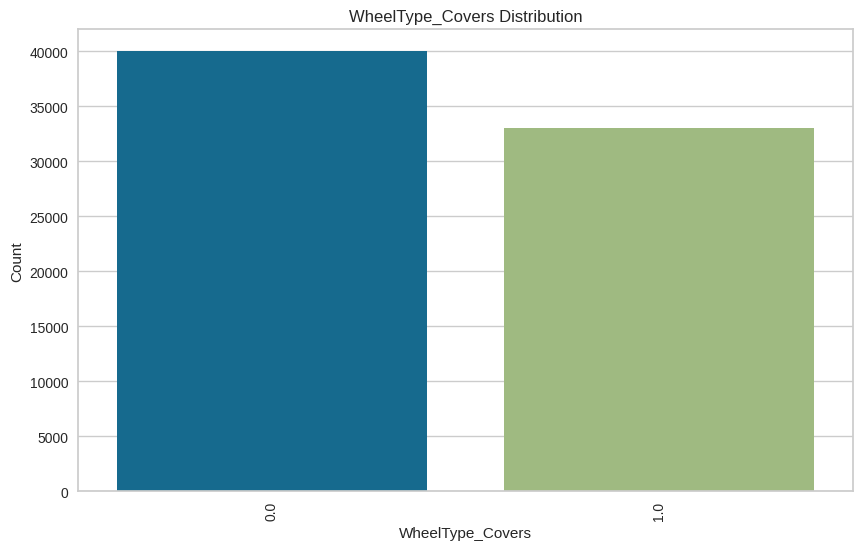

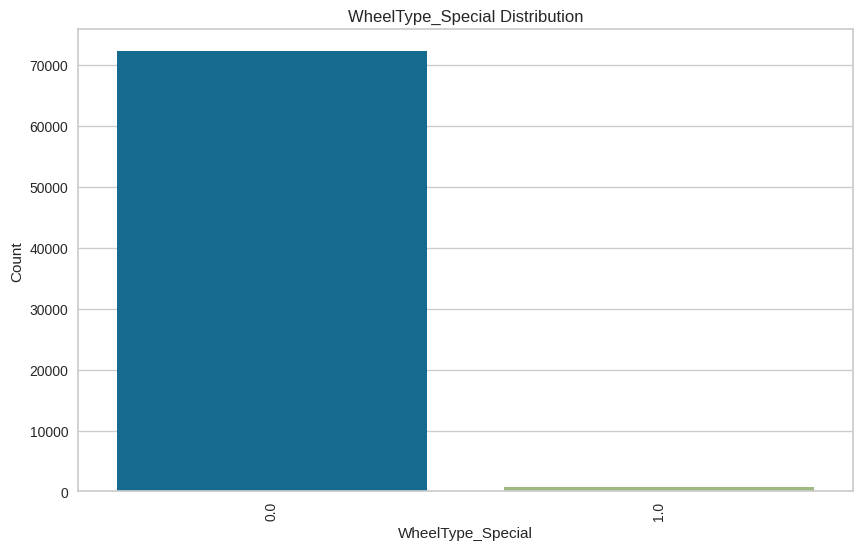

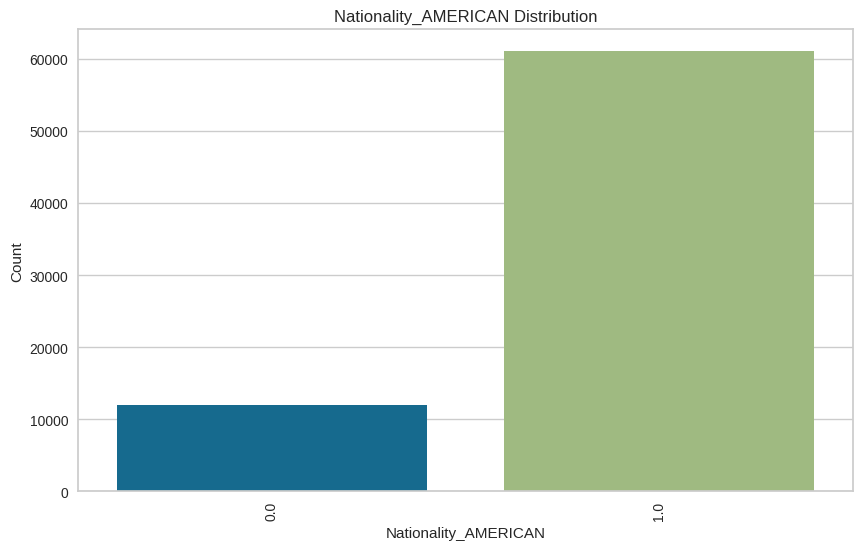

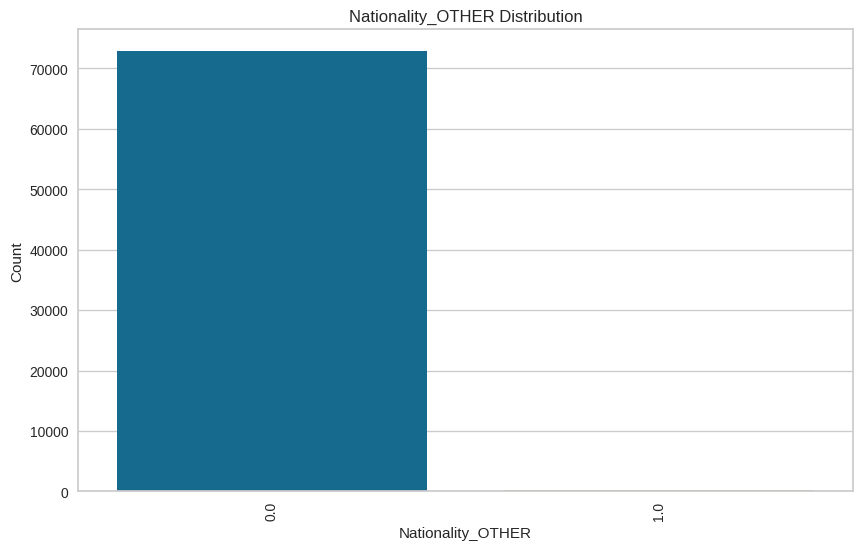

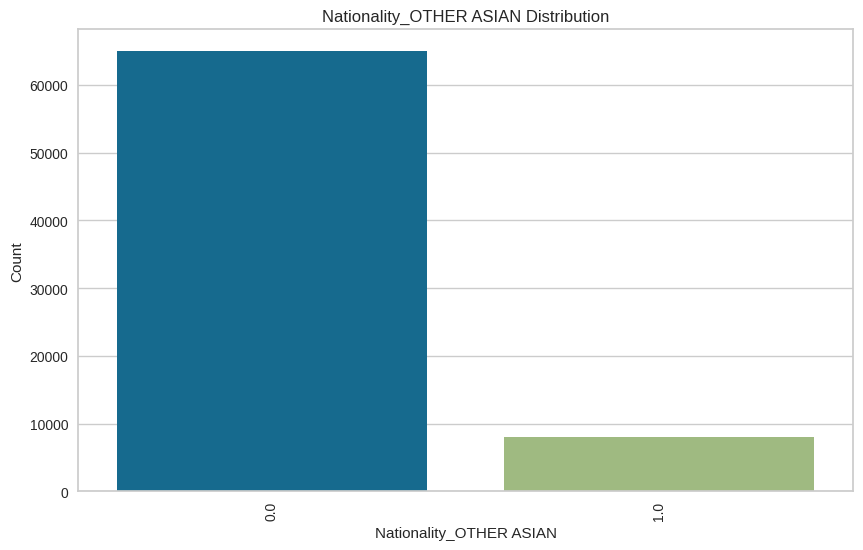

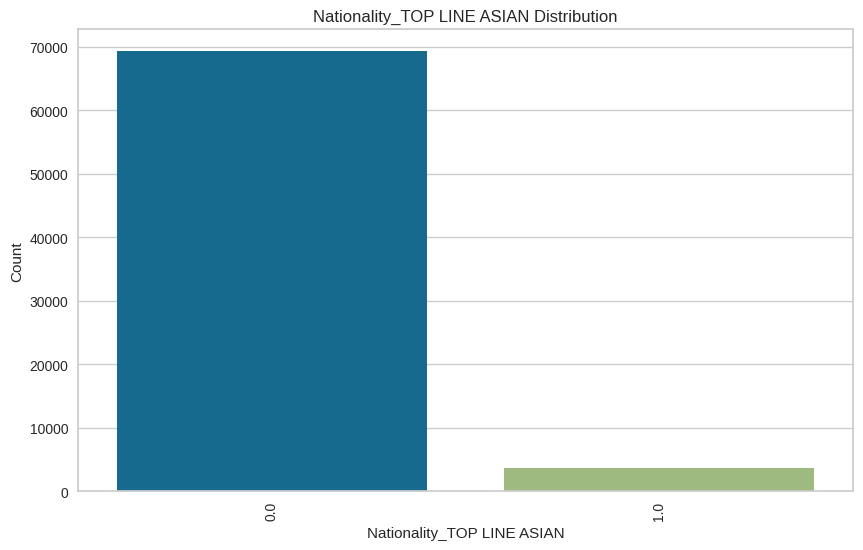

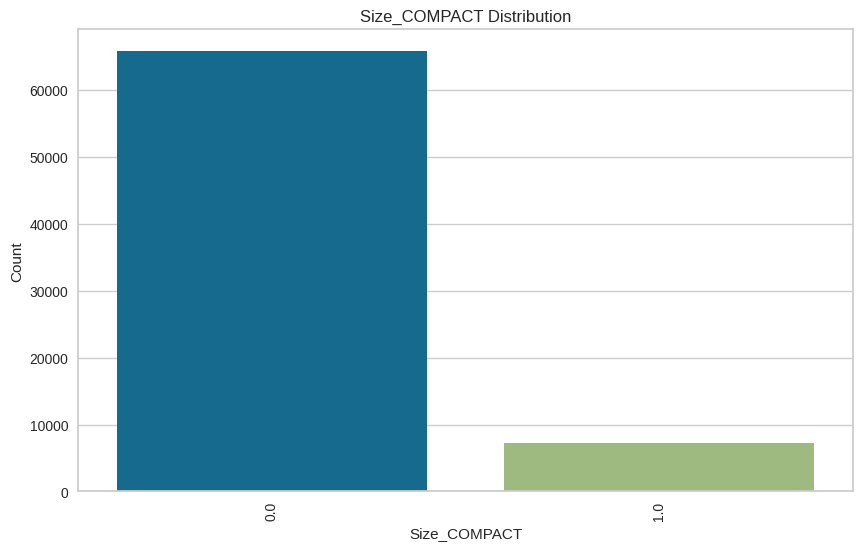

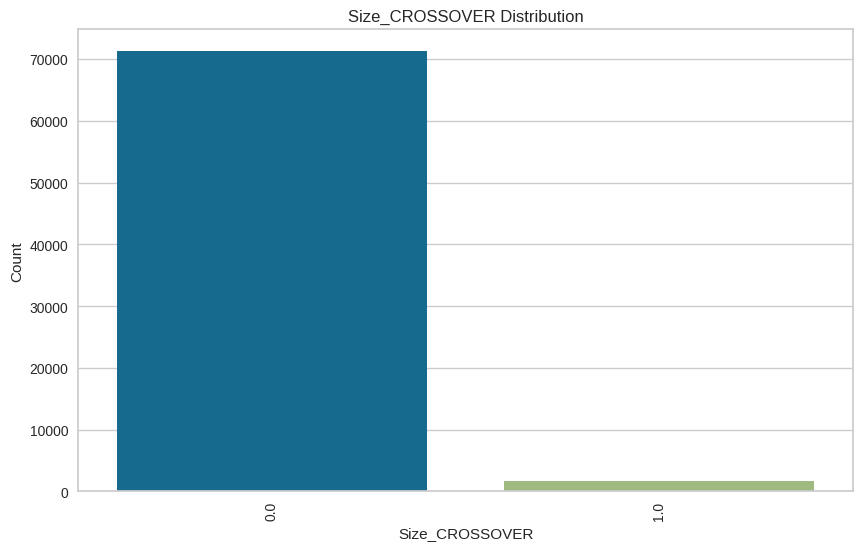

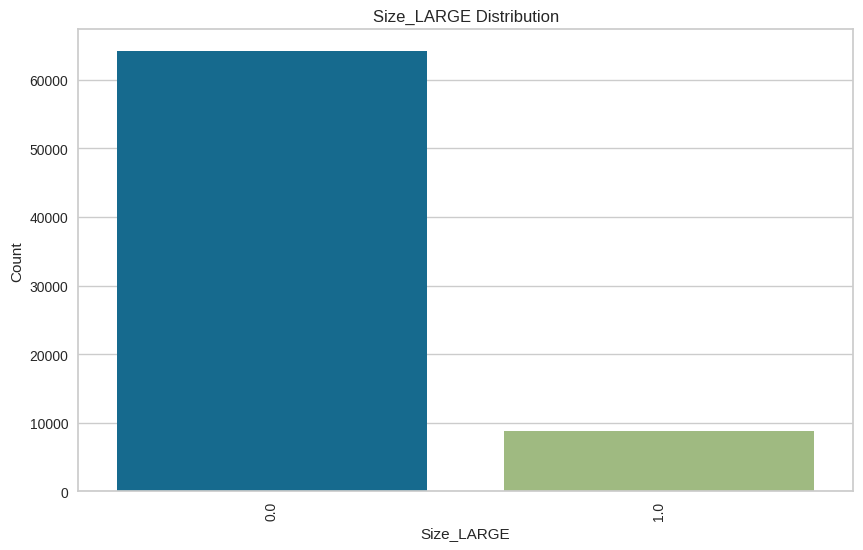

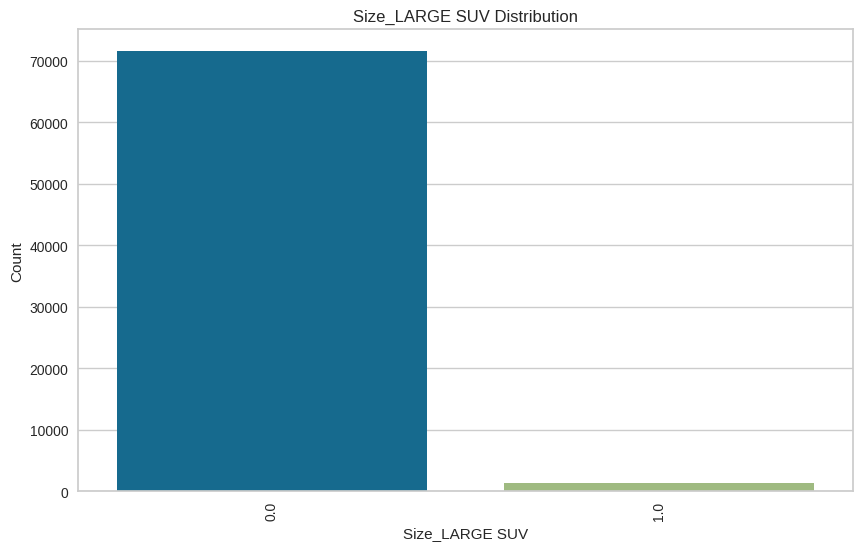

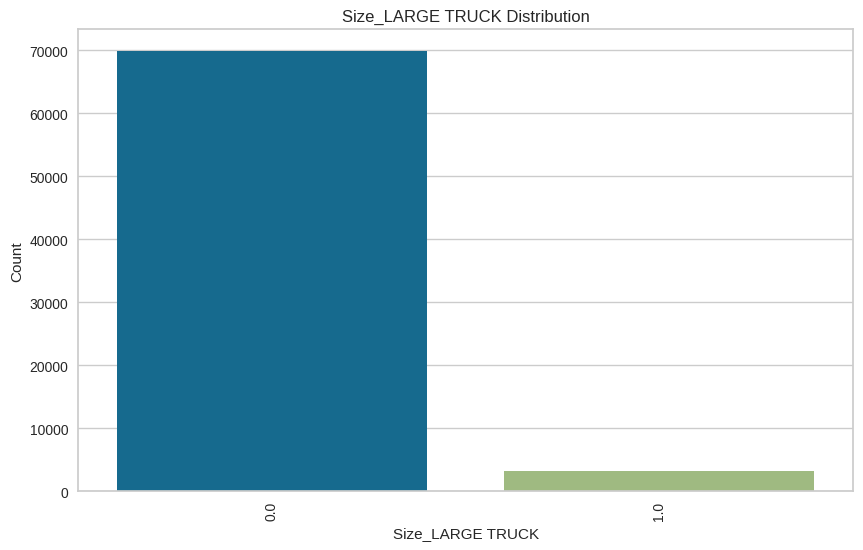

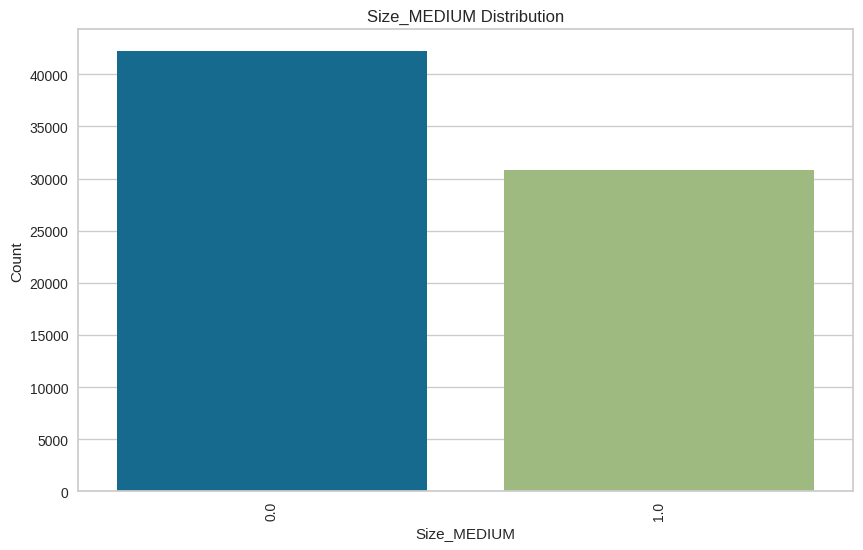

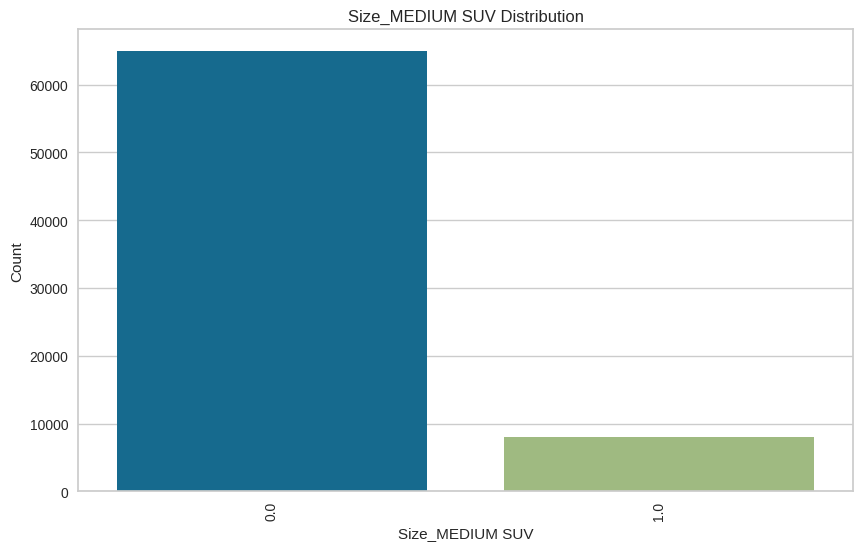

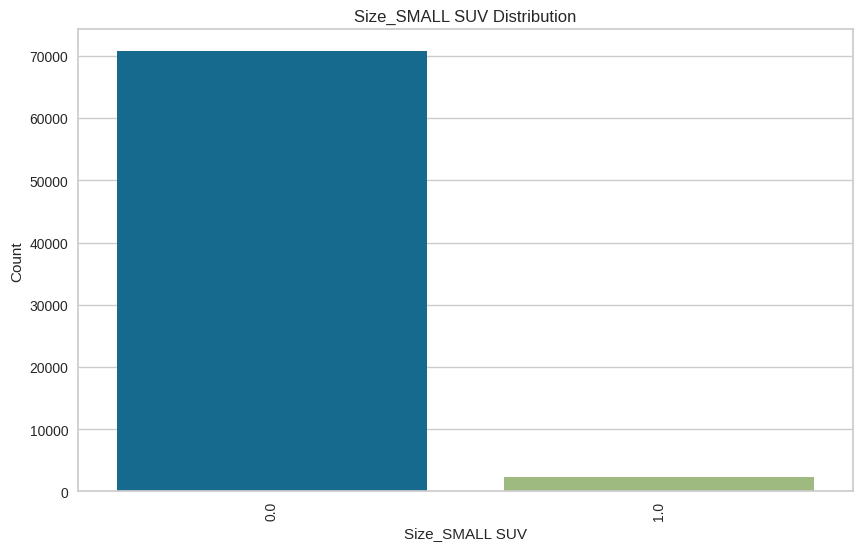

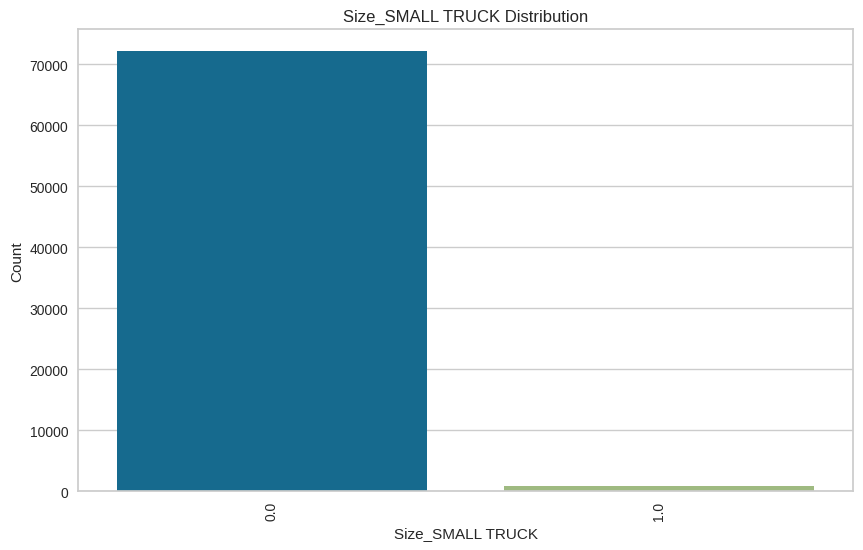

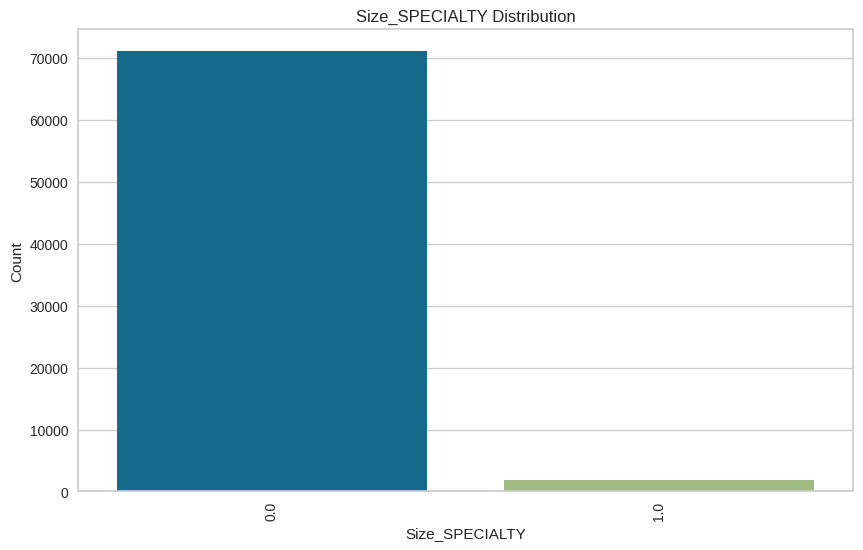

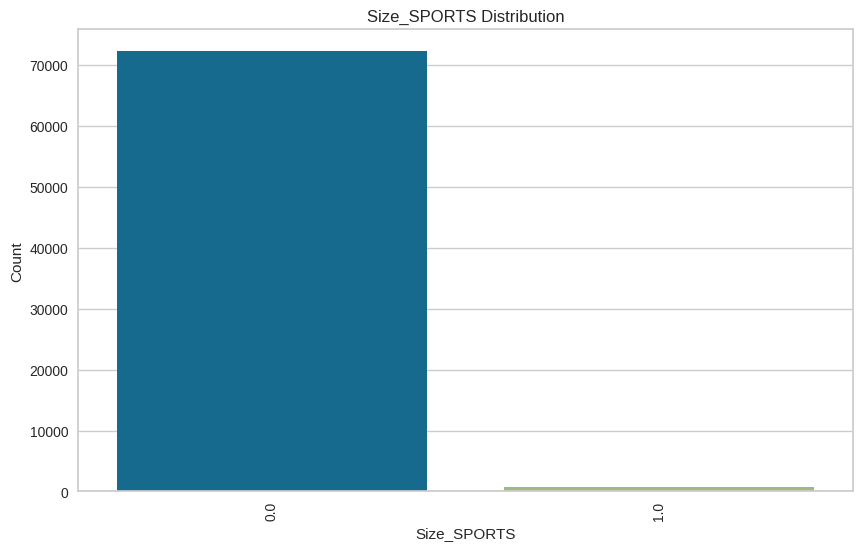

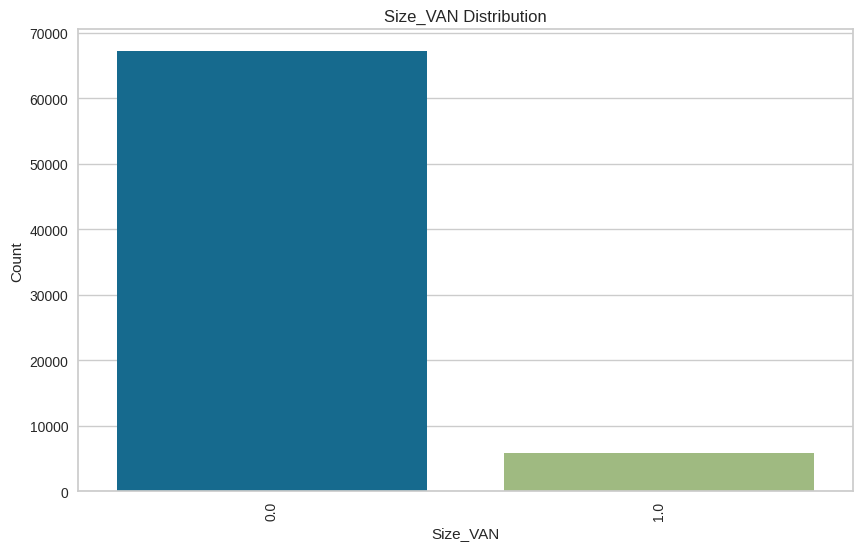

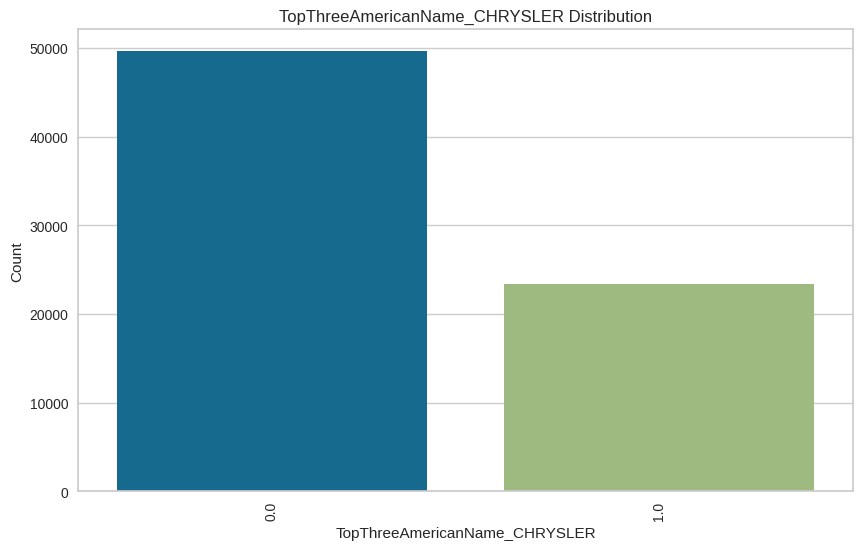

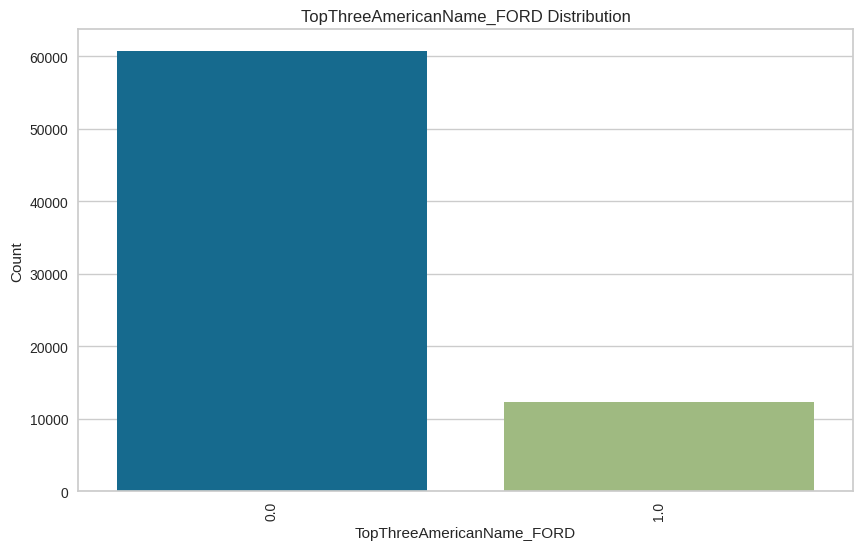

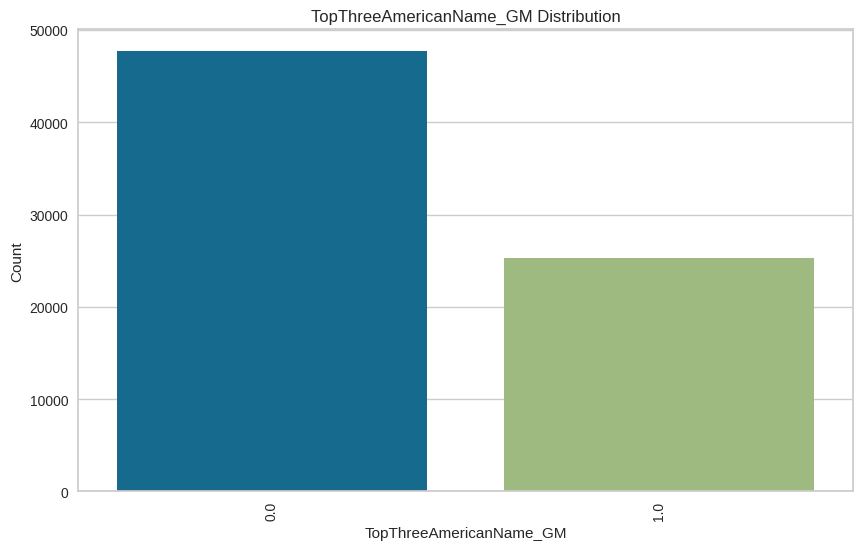

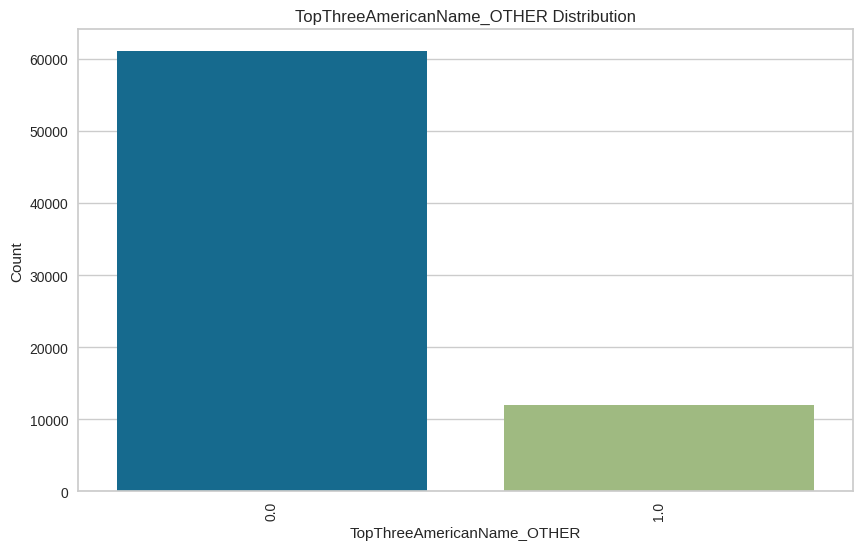

In [609]:


# Assuming you have a DataFrame called 'X_train' with the features and their corresponding categories

# Iterate over each feature

for feature in encoded_cols:
    # Create a count plot for the current feature
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=90)
    plt.show()

From the above we observe that the data is highly imbalanced. which again would lead to biasing the model 

In [610]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Create an instance of SMOTE
smote = SMOTE()

# Perform oversampling on the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)


As there imbalance in data so we perform upsampling of the whole X_train data set using SMOTE

# Data Split 

In [611]:
X_train = resampled_df.drop("IsBadBuy", axis=1)
y_train = resampled_df["IsBadBuy"]

In [612]:
train_input, val_input, train_target, val_target = train_test_split(X_train, y_train, test_size=0.1)
test_input = X_test

We divide the X_train data set into train (90% data) and validation set (10% data), So we can train our model on train data set and check its performance using the validation set

# Model Train, Testing and Performance Analysis

## Logistic Regression

In [613]:


logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(X_train, y_train)


y_pred=logreg.predict(X_train)


We use logistic regression for classification here. It being one of the most basic and power full algorithms

In [614]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred)

# Calculate F1-score
f1 = f1_score(y_train, y_pred)

# Print the scores
print("accuracy:",accuracy )
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

accuracy: 0.6427890699454747
Precision: 0.6430931095489346
Recall: 0.641726686143703
F1-score: 0.6424091712413393


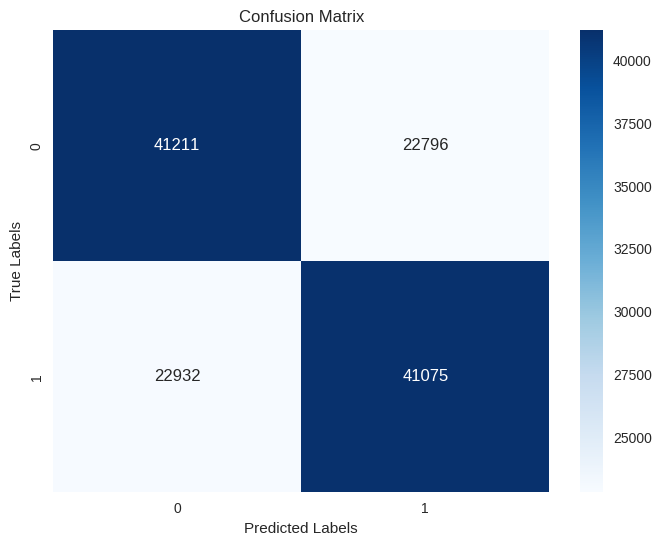

In [615]:



# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [616]:
y_pred_validation=logreg.predict(val_input)

# Calculate accuracy
accuracy = accuracy_score(val_target, y_pred_validation)

# Calculate precision
precision = precision_score(val_target, y_pred_validation)

# Calculate recall
recall = recall_score(val_target, y_pred_validation)

# Calculate F1-score
f1 = f1_score(val_target, y_pred_validation)

# Print the scores
print("accuracy on validation set:",accuracy )
print("Precision on validation set:", precision)
print("Recall on validation set:", recall)
print("F1-score on validation set:", f1)


accuracy on validation set: 0.6417747226995781
Precision on validation set: 0.6433380303741976
Recall on validation set: 0.6403303724481845
F1-score on validation set: 0.6418306779131521


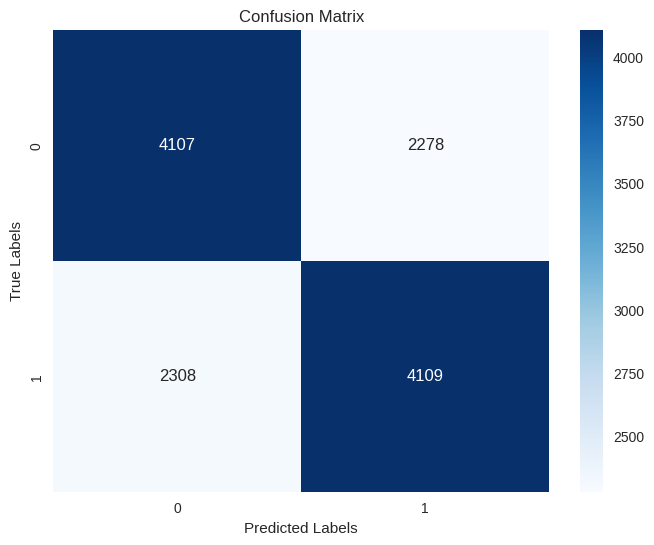

In [617]:
# Compute the confusion matrix
cm = confusion_matrix(val_target, y_pred_validation)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

From the above we see that Logistic Regression has not effectively performed very well

In [618]:
# Predict the target variable for the test data
y_pred_logreg = logreg.predict(X_test)


## XGBClassifier

In [619]:



# Create an instance of the XGBClassifier model
xgb_clf = xgb.XGBClassifier()

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the train data
y_pred = xgb_clf.predict(X_train)



My 2nd choice on the list is Extreme Gradient boost being one of the most popular Ensembling techniques out there and for is very good performance reputation. 

In [620]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred)

# Calculate F1-score
f1 = f1_score(y_train, y_pred)

# Print the scores
print("accuracy on training set:",accuracy )
print("Precision on training set:", precision)
print("Recall on training set:", recall)
print("F1-score on training set:", f1)


accuracy on training set: 0.9114315621728873
Precision on training set: 0.9810393643255092
Recall on training set: 0.8390801006139953
F1-score on training set: 0.904523713284829


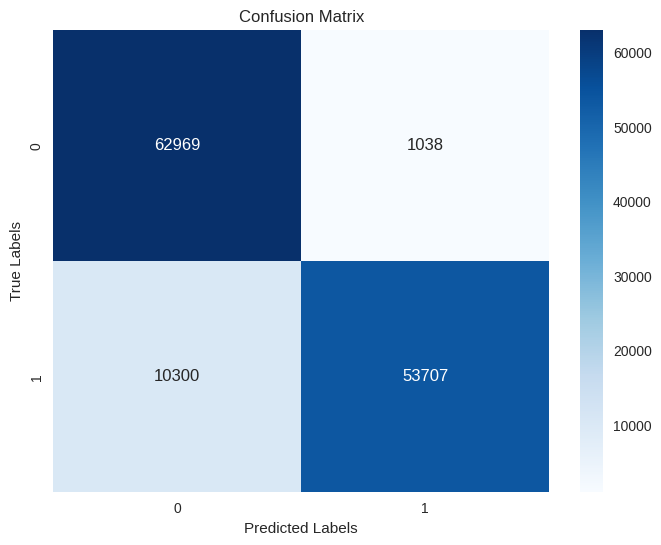

In [621]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [622]:
y_pred_validation=xgb_clf.predict(val_input)

# Calculate accuracy
accuracy = accuracy_score(val_target, y_pred_validation)

# Calculate precision
precision = precision_score(val_target, y_pred_validation)

# Calculate recall
recall = recall_score(val_target, y_pred_validation)

# Calculate F1-score
f1 = f1_score(val_target, y_pred_validation)

# Print the scores
print("accuracy on validation set:",accuracy )
print("Precision on validation set:", precision)
print("Recall on validation set:", recall)
print("F1-score on validation set:", f1)

accuracy on validation set: 0.9171223246367755
Precision on validation set: 0.9821750090025207
Recall on validation set: 0.8500857098332554
F1-score on validation set: 0.9113691420933925


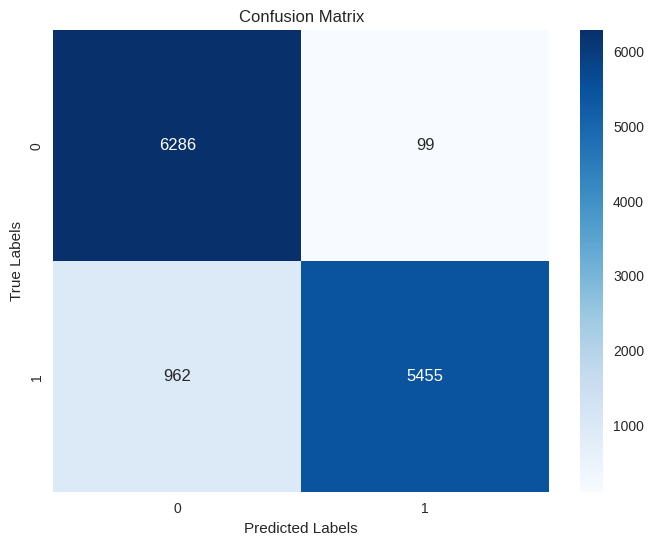

In [623]:
# Compute the confusion matrix
cm = confusion_matrix(val_target, y_pred_validation)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

We see that compared to Logistic Regression XGBclassifier has performed extremed well with very good accuracy , precision, recall and F1 score

In [624]:
# Make predictions on the testing data
y_pred_XGB = xgb_clf.predict(X_test)

## KNN Classifier

In [625]:
# Create an instance of the KNeighborsClassifier model with k=3
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the training data
y_pred = knn.predict(X_train)


The 3rd on my list is KNN classifier, it being one of the most popular classification algorthim which is primarily used for classification problems

> Indented block



In [626]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred)

# Calculate F1-score
f1 = f1_score(y_train, y_pred)

# Print the scores
print("accuracy on training set:",accuracy )
print("Precision on training set:", precision)
print("Recall on training set:", recall)
print("F1-score on training set:", f1)

accuracy on training set: 0.995859827831331
Precision on training set: 1.0
Recall on training set: 0.9917196556626618
F1-score on training set: 0.9958426155439114


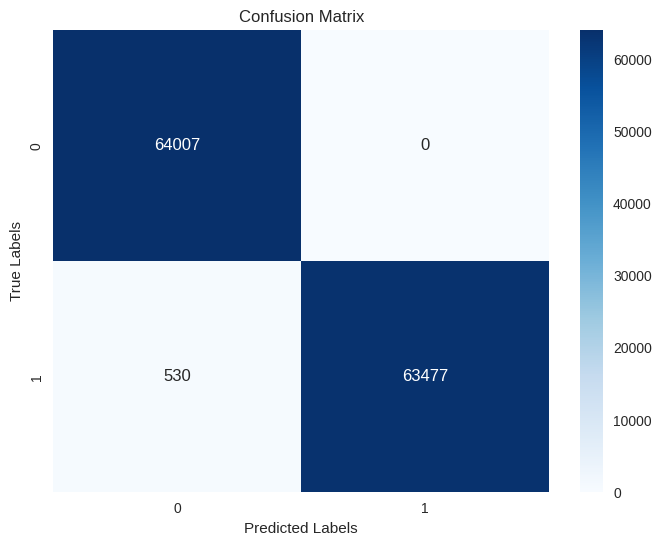

In [627]:
cm = confusion_matrix(y_train, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [628]:
y_pred_validation=knn.predict(val_input)

# Calculate accuracy
accuracy = accuracy_score(val_target, y_pred_validation)

# Calculate precision
precision = precision_score(val_target, y_pred_validation)

# Calculate recall
recall = recall_score(val_target, y_pred_validation)

# Calculate F1-score
f1 = f1_score(val_target, y_pred_validation)

# Print the scores
print("accuracy on validation set:",accuracy )
print("Precision on validation set:", precision)
print("Recall on validation set:", recall)
print("F1-score on validation set:", f1)

accuracy on validation set: 0.9958600218715825
Precision on validation set: 1.0
Recall on validation set: 0.9917406887953872
F1-score on validation set: 0.9958532196228777


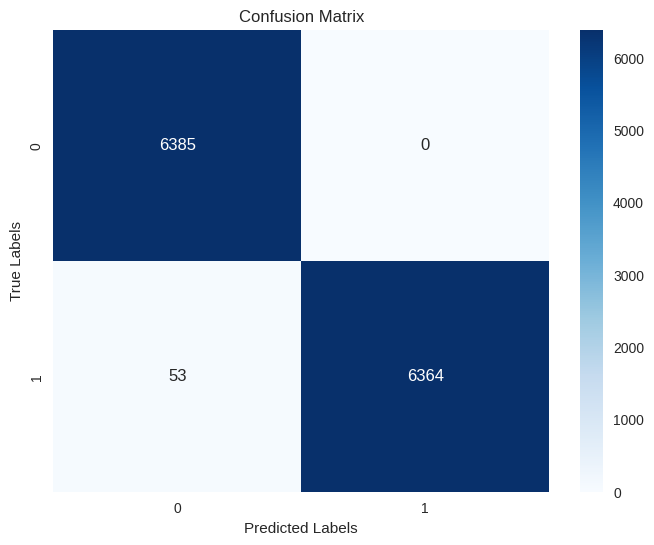

In [629]:
# Compute the confusion matrix
cm = confusion_matrix(val_target, y_pred_validation)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

KNN performs the best among all 3 used with very high accuracy , precision, recall and F1 score

In [630]:
# Make predictions on the testing data
y_pred = knn.predict(X_test)

## Artifical Neural Network - Classification

In [631]:
# Create the ANN model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model = keras.Sequential([]): Creates a sequential model, which is a linear stack of layers.

keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)): Adds a fully connected (dense) layer with 16 units/neurons. The activation function used is ReLU (Rectified Linear Unit). The input_shape parameter defines the shape of the input data. In this case, it is set to the number of features in X_train.

keras.layers.Dense(16, activation='relu'): Adds another fully connected layer with 16 units/neurons and ReLU activation.

keras.layers.Dense(1, activation='sigmoid'): Adds the output layer with a single neuron, representing the binary classification output. The activation function used is the sigmoid function, which gives a probability output between 0 and 1.

In [632]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

optimizer='adam': This sets the optimizer algorithm to Adam. Adam is an optimization algorithm that is commonly used for training neural networks, which give learning rate.

loss='binary_crossentropy': This sets the loss function to binary cross-entropy. Binary cross-entropy is a common choice for binary classification problems, where the goal is to predict one of two classes.

metrics=['accuracy']: This sets the evaluation metric to accuracy. Accuracy measures the proportion of correctly classified samples in the total number of samples.

In [633]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(val_input, val_target))

Epoch 1/10
4001/4001 [==============================] - 9s 2ms/step - loss: 0.6225 - accuracy: 0.6539 - val_loss: 0.6060 - val_accuracy: 0.6709
Epoch 2/10
4001/4001 [==============================] - 7s 2ms/step - loss: 0.5983 - accuracy: 0.6800 - val_loss: 0.5877 - val_accuracy: 0.6880
Epoch 3/10
4001/4001 [==============================] - 8s 2ms/step - loss: 0.5847 - accuracy: 0.6930 - val_loss: 0.5750 - val_accuracy: 0.7003
Epoch 4/10
4001/4001 [==============================] - 8s 2ms/step - loss: 0.5735 - accuracy: 0.7025 - val_loss: 0.5653 - val_accuracy: 0.7083
Epoch 5/10
4001/4001 [==============================] - 7s 2ms/step - loss: 0.5617 - accuracy: 0.7119 - val_loss: 0.5515 - val_accuracy: 0.7153
Epoch 6/10
4001/4001 [==============================] - 8s 2ms/step - loss: 0.5478 - accuracy: 0.7201 - val_loss: 0.5353 - val_accuracy: 0.7263
Epoch 7/10
4001/4001 [==============================] - 8s 2ms/step - loss: 0.5303 - accuracy: 0.7295 - val_loss: 0.5258 - val_accuracy:

X_train and y_train: These are the input features and target labels, respectively, for the training data.

epochs=10: This specifies the number of times the entire training dataset will be passed through the model during training.

batch_size=32: This determines the number of samples that will be processed together before updating the model's weights. It is a hyperparameter that can affect training speed and memory usage.

validation_data=(val_input, val_target): This provides validation data to evaluate the model's performance during training. val_input and val_target represent the input features and target labels, respectively, for the validation data.

In [634]:
# Evaluate the model on the train set
loss, accuracy = model.evaluate(X_train, y_train)
print("Train loss:", loss)
print("train accuracy:", accuracy)

4001/4001 [==============================] - 6s 1ms/step - loss: 0.4866 - accuracy: 0.7535
Train loss: 0.48661112785339355
train accuracy: 0.7535113096237183


In [635]:
y_pred = model.predict(X_train)

4001/4001 [==============================] - 5s 1ms/step


In [636]:
prediction=[]
for i in range(len(y_pred)):
  if y_pred[i][0]>0.5:
    prediction.append(1)
  else:
    prediction.append(0)


convert the predicted probabilities from a binary classification model into (1 or 0) labels

In [637]:
y_pred= pd.DataFrame(prediction, columns=['prediction'])

In [638]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred['prediction'])

# Calculate precision
precision = precision_score(y_train, y_pred['prediction'])

# Calculate recall
recall = recall_score(y_train, y_pred['prediction'])

# Calculate F1-score
f1 = f1_score(y_train, y_pred['prediction'])

# Print the scores
print("accuracy on training set:",accuracy )
print("Precision on training set:", precision)
print("Recall on training set:", recall)
print("F1-score on training set:", f1)

accuracy on training set: 0.7535113346977674
Precision on training set: 0.7706085419341927
Recall on training set: 0.7219210398862624
F1-score on training set: 0.7454706783899331


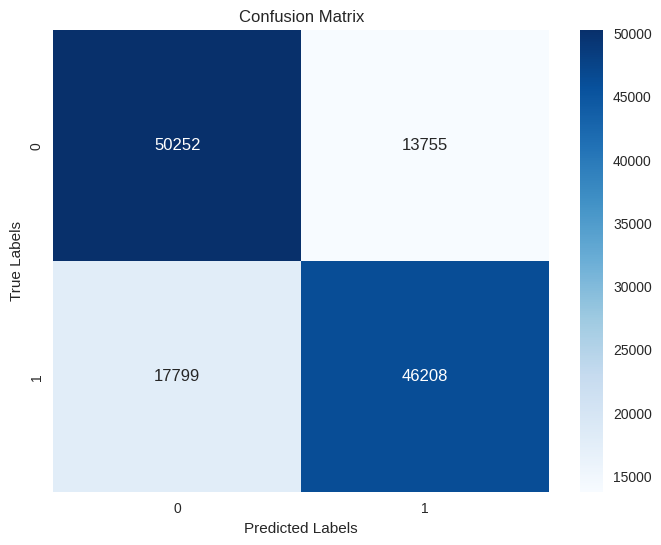

In [639]:
cm = confusion_matrix(y_train,  y_pred['prediction'])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [640]:
y_pred = model.predict(val_input)

401/401 [==============================] - 0s 1ms/step


In [641]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(val_input, val_target)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

401/401 [==============================] - 1s 1ms/step - loss: 0.4902 - accuracy: 0.7496
Test loss: 0.4901868402957916
Test accuracy: 0.7496485114097595


In [642]:
y_pred = model.predict(val_input)
prediction=[]
for i in range(len(y_pred)):
  if y_pred[i][0]>0.5:
    prediction.append(1)
  else:
    prediction.append(0)

401/401 [==============================] - 0s 1ms/step


In [643]:
y_pred= pd.DataFrame(prediction, columns=['prediction'])

In [644]:
# Calculate accuracy
accuracy = accuracy_score(val_target, y_pred['prediction'])

# Calculate precision
precision = precision_score(val_target, y_pred['prediction'])

# Calculate recall
recall = recall_score(val_target, y_pred['prediction'])

# Calculate F1-score
f1 = f1_score(val_target, y_pred['prediction'])

# Print the scores
print("accuracy on training set:",accuracy )
print("Precision on training set:", precision)
print("Recall on training set:", recall)
print("F1-score on training set:", f1)

accuracy on training set: 0.7496484924230589
Precision on training set: 0.7682030728122913
Recall on training set: 0.7168458781362007
F1-score on training set: 0.7416364369205967


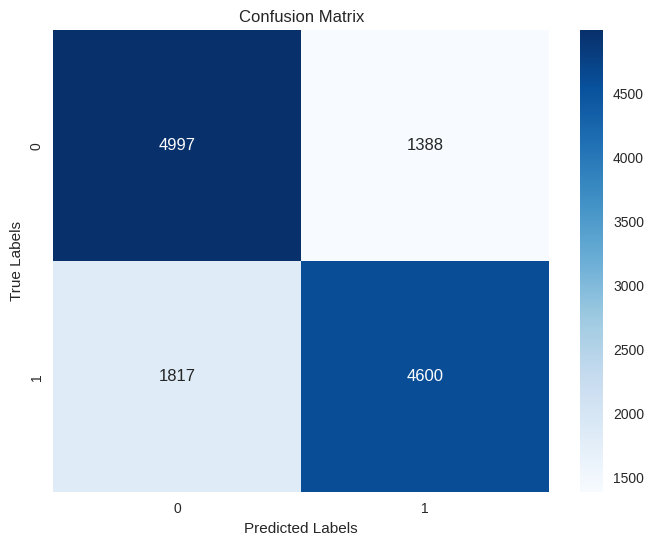

In [645]:
cm = confusion_matrix(val_target,  y_pred['prediction'])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

the ANN performs average with average accuracy , precision, recall and F1 score

In [646]:
y_test = model.predict(X_test)

1523/1523 [==============================] - 2s 1ms/step


## AutoML- Pycaret - best model select - Classification  

In [647]:
pip install pycaret 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [648]:
from pycaret.classification import *

In [649]:
df_train = pd.read_csv('/content/training.csv')

In [650]:
df_test = pd.read_csv('/content/test.csv')

In [651]:
model_description = setup(data = df_train, target = 'IsBadBuy',feature_selection = True,remove_multicollinearity = True, multicollinearity_threshold = 0.9)

,Description,Value
0,Session id,1215
1,Target,IsBadBuy
2,Target type,Binary
3,Original data shape,"(72983, 34)"
4,Transformed data shape,"(72983, 7)"
5,Transformed train set shape,"(51088, 7)"
6,Transformed test set shape,"(21895, 7)"
7,Ordinal features,3
8,Numeric features,18
9,Categorical features,15


In the above we pass Multicollinearity threshold, remove_multicollinearity and feature Selection as a hyper parameter along with traing data and target feature

In [652]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8839,0.6813,0.0958,0.5137,0.1510,0.1311,0.1764,1.3330
gbc,Gradient Boosting Classifier,0.8836,0.6813,0.0906,0.5894,0.1441,0.1252,0.1786,6.5370
ada,Ada Boost Classifier,0.8828,0.6766,0.0880,0.5218,0.1398,0.1202,0.1664,2.2450
rf,Random Forest Classifier,0.8819,0.6635,0.1057,0.4856,0.1659,0.1392,0.1823,8.5730
xgboost,Extreme Gradient Boosting,0.8811,0.6746,0.1046,0.4586,0.1640,0.1365,0.1761,4.4130
et,Extra Trees Classifier,0.8801,0.6624,0.1055,0.4568,0.1661,0.1364,0.1757,4.8110
nb,Naive Bayes,0.8771,0.6212,0.0025,0.7484,0.0051,0.0041,0.0346,1.0230
lr,Logistic Regression,0.8770,0.5944,0.0000,0.0000,0.0000,0.0000,0.0000,6.2090
dummy,Dummy Classifier,0.8770,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9950
ridge,Ridge Classifier,0.8767,0.0000,0.0014,0.2560,0.0028,0.0016,0.0108,1.0320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Here we select best model based on accuracy 

In [653]:
AutoML_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8945,0.7407,0.2213,0.7354,0.3403,0.3005,0.3656
1,0.8943,0.7305,0.2054,0.7588,0.3233,0.2859,0.3593
2,0.8988,0.7444,0.2596,0.7581,0.3867,0.3457,0.4055
3,0.8757,0.6402,0.0080,0.2941,0.0155,0.0091,0.0301
4,0.8759,0.6609,0.0080,0.3125,0.0155,0.0095,0.0324
5,0.8914,0.7179,0.2019,0.7056,0.3140,0.2742,0.3387
6,0.8765,0.6618,0.0191,0.4615,0.0366,0.0271,0.0737
7,0.8769,0.6219,0.0064,0.5000,0.0126,0.0095,0.0454
8,0.8755,0.6465,0.0080,0.2778,0.0155,0.0087,0.0280


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


further tune the model using cross-validation on the training data.

In [654]:
print(AutoML_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1215, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [655]:
evaluate_model(AutoML_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

pycaret offers various graphs and  matrices to check and drive conclusions

In [656]:
final_Auto_Model = finalize_model(AutoML_model)

In [657]:
predictions = predict_model(final_Auto_Model, data=df_test)

# Conclusion 


Among all the models KNN Classifier performs the best with

<br/>

**Training Scores**

accuracy on training set: 0.9958285812489259

Precision on training set: 1.0

Recall on training set: 0.9916571624978519

F1-score on training set: 0.9958111076247255


<br/>

**Validation scores** - 

accuracy on validation set: 0.996484924230589

Precision on validation set: 1.0

Recall on validation set: 0.9929111531190926

F1-score on validation set: 0.9964429689352621

